In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc
import scipy.io as sio
import os 
import itertools
import re
from matplotlib.patches import Polygon
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
font = {'family' : 'sans-serif',
        'style' : 'normal',
        'weight' : 'light',
        'size'   : 20}

rc('font', **font)

In [2]:
DEBUG = False

In [3]:
def load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id):
    mat = sio.loadmat(file_path)
    mat_data = mat[file_name]['daq'][0, 0]
    t = pd.DataFrame(mat_data['t'][0,0], columns = ["timeStamp"])
    data = pd.DataFrame(mat_data['DAQ_DATA'][0, 0], columns = [
        'channel_1',
        'channel_2',
        'channel_3',
        'channel_4',
        'channel_5',
        'channel_6',
        'channel_7',
        'channel_8'
      ])
    #res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False).set_index('TimeStamp')
    res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False)
    res['userID'] = user_id
    res['gamePhase'] = g_phase_id
    res['testPhase'] = phase_id
    res['movementID'] = movement_id
    return res

In [4]:
def generate_df():
    df = pd.DataFrame() # Main DataFrame
    rootdir = os.path.join(os.path.dirname(os.getcwd()) + "/Data_Sets/")
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(".mat") and (file.startswith("data__capslog") == False) and (file.endswith("discard.mat") == False):
                file_path = os.path.join(subdir, file)
                file_name = file.replace(".mat", "")
                try: 
                    list_subdir = subdir.replace(rootdir,"").split("/")
                    user_id = [s for s in list_subdir if "user" in s][0].replace("user_","")
                    g_phase_id = [s for s in list_subdir if "game" in s][0] # Trainig Phase ID
                    list_fileName = ["".join(x) for _, x in itertools.groupby(file.split("_")[1].replace("Phase", ""), key=str.isdigit)]
                    phase_id = list_fileName[0].replace("Phase", "") 
                    movement_id = re.sub(r"(\w)([A-Z])", r"\1 \2", list_fileName[1])
                except:
                    print("Error: Please check the Directory's hierarchy -> Corrupt")
                df = df.append(load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id)) 
    return df

In [5]:
# General line-chart plot
def plot_line_chart(ax, df, user_id, g_phase_id, phase_id, movement_id):
    m_title = "Line Chart: " + g_phase_id + " - Phase " + phase_id + " - " + movement_id
    ax.set_title(m_title)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Intensity')
    ax.grid(True)
    for channel in df.loc[:, 'channel_1':'channel_8'].columns:
        ax.plot(df[(df.userID==user_id) & (df.gamePhase==g_phase_id) & (df.testPhase==phase_id) & (df.movementID==movement_id)].index - df[(df.userID==user_id) & (df.gamePhase==g_phase_id) & (df.testPhase==phase_id) & (df.movementID==movement_id)].index[0], df[(df.userID==user_id) & (df.gamePhase==g_phase_id) & (df.testPhase==phase_id) & (df.movementID==movement_id)].loc[:,channel], label=channel)
        ax.set_xlim(xmin=0)
    ax.legend(loc='upper left')

In [6]:
df = generate_df()

In [7]:
df

timeStamp  channel_1  channel_2  channel_3  channel_4  channel_5  \
0         0.000  -2.822843  -0.242390  -0.103075   0.883879  -0.342031   
1         0.001  -0.983520  -0.995575  -0.399863   0.578088  -0.412528   
2         0.002   1.082399  -1.858320  -0.624323  -0.085527  -0.156634   
3         0.003   2.019455  -2.448234  -0.753262  -0.932250   0.016403   
4         0.004   1.484779  -1.670634  -0.353170  -2.197986   0.046616   
5         0.005  -0.649500  -0.227436   0.420768  -3.170748   0.227436   
6         0.006  -2.636225   0.305715   0.917449  -2.580377   0.333028   
7         0.007  -2.322652   0.519036   0.826658   0.262989   0.028763   
8         0.008  -0.351034   1.123751   0.137407   4.035325  -0.244678   
9         0.009   1.203555   0.981689  -0.620050   5.000000  -0.168383   
10        0.010   1.294499   0.271992  -0.579461   2.423209  -0.288777   
11        0.011   0.299916   0.669795   0.066758  -0.445792  -0.611048   
12        0.012   0.079728   1.517128   0.322042  -1.294499  -0.343557   
13        0.013   1.572671   1.200504   0.165026  -1.881971   0.241169   
14        0.014   2.336995   0.585718   0.220874  -2.530632   0.262989   
15        0.015   0.743038   0.599908   0.256580  -1.706950   0.170214   
16        0.016  -0.668727   0.203937  -0.170367   0.124743   0.586633   
17        0.017  -0.501335  -0.831388  -0.634852   1.465858   0.836118   
18        0.018  -0.792020  -1.607309  -0.624628   1.713054   0.520562   
19        0.019  -1.896620  -2.177386  -0.199054   0.889982   0.136950   
20        0.020  -2.246204  -2.397879   0.357900  -0.007858  -0.345083   
21        0.021  -1.575113  -1.429999   0.643091  -0.318074  -0.947509   
22        0.022   0.065232  -0.021897   0.323873  -0.965515  -0.877165   
23        0.023   1.871443   0.521782  -0.322499  -1.622721  -0.162585   
24        0.024   1.569314   0.831083  -0.572595  -0.824063   0.135882   
25        0.025   0.002060   1.403143  -0.198291   0.290455  -0.052873   
26        0.026   0.233082   1.244907   0.242084   0.271839  -0.040970   
27        0.027   0.726101   0.656367   0.303273   0.436484   0.070420   
28        0.028  -0.821317   0.884031   0.226368   1.256962   0.046921   
29        0.029  -1.376898   1.246891   0.295949   1.308537   0.210803   
...         ...        ...        ...        ...        ...        ...   
4945      4.945   0.488823  -0.153735  -0.387045   0.245441  -0.861295   
4946      4.946   0.412680  -0.096056  -0.123674  -2.026474   0.083696   
4947      4.947   0.070573   0.167926   0.744259  -4.838254   1.351415   
4948      4.948  -0.239490   0.356222   0.852293  -4.857023   1.715038   
4949      4.949  -0.305715   0.265736  -0.102617  -1.948348   0.327077   
4950      4.950  -0.197681   0.131914  -1.051728   2.776761  -1.259098   
4951      4.951   0.100023  -0.053025  -0.922789   5.000000  -0.325246   
4952      4.952   0.371939  -0.204395  -0.133745   5.000000   1.483406   
4953      4.953   0.140764   0.115740   0.194476   0.066300  -0.010758   
4954      4.954  -0.273976   0.377737   0.271534  -5.000000  -2.926757   
4955      4.955  -0.171435  -0.114977   0.563592  -4.888304  -2.324483   
4956      4.956   0.090715  -0.380484   0.334096  -1.213321   0.420920   
4957      4.957  -0.060044   0.131304  -0.360800   2.204547   1.276646   
4958      4.958  -0.221790   0.000839  -0.272908   2.226825   0.851835   
4959      4.959  -0.060502  -0.960937   0.367819  -0.105669   0.949493   
4960      4.960   0.115740  -0.936980   0.167010  -0.662013   0.885557   
4961      4.961   0.179217   0.174487  -0.572137   0.536126   0.671168   
4962      4.962   0.191730   0.666285  -0.362783   0.463798   1.344854   
4963      4.963   0.120012   0.383993   0.602197  -1.482795   1.403449   
4964      4.964   0.081102   0.243305   0.804685  -3.873121  -0.991608   
4965      4.965   0.086290   0.137560  -0.145190  -2.367819  -3.266270   
4966      4.966  -0.072557   0.005264  -1.046387   4.303578  -2.267872   
4967      

In [8]:
# Debugging Variables
user_id = np.unique(df.userID)[0]
g_phase_id = np.unique(df.gamePhase)[0]
phase_id = np.unique(df[(df.gamePhase == g_phase_id)].testPhase)[0]
movement_id = np.unique(df[(df.testPhase == phase_id) & (df.gamePhase == g_phase_id)].movementID)[0]
#print (user_id, g_phase_id, phase_id, movement_id)

In [9]:
if DEBUG:
    fig, ax = plt.subplots(1, 1,figsize=(30,10))
    plot_line_chart(ax, df, user_id, g_phase_id, phase_id, movement_id)

In [10]:
if DEBUG:
    fig, axs = plt.subplots(8, 1,figsize=(15,60))
    fig.suptitle('Phase  4 - Pre/Postgame')
    res = df[(df.userID == user_id) & (df.testPhase == '4') & (df.gamePhase == 'Pregame')]
    scale_labels_left = np.unique(res.movementID)
    id_boxplot = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
    res.boxplot(id_boxplot, by = 'movementID', showmeans=True, ax = axs, widths = 0.2)

In [11]:
def draw_boxplot(data, edge_color, fill_color, offset, ax):
    # TODO: calculate variance for every box
    bp = ax.boxplot(data, patch_artist=True, notch=0, sym='+', vert=1, whis=1.5, widths =.3, positions=np.array(range(data.shape[1]))+offset)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  
    
    return bp

In [12]:
def phase4_boxplot_per_user_all_channels(movement_id, user_id, ax):
    # Extracting Data
    res_pre = df[(df.userID == user_id) & (df.testPhase == '4') & (df.gamePhase == 'Pregame')]
    data_pre = res_pre[res_pre.movementID == movement_id].copy()
    data_pre.drop(labels=['userID', 'gamePhase', 'testPhase', 'movementID', 'timeStamp'], axis=1, inplace=True)

    res_post = df[(df.userID == user_id) & (df.testPhase == '4') & (df.gamePhase == 'Postgame')]
    data_post = res_post[res_post.movementID == movement_id].copy()
    data_post.drop(labels=['userID', 'gamePhase', 'testPhase', 'movementID', 'timeStamp'], axis=1, inplace=True)


    # Generating Plot + Labels
    scale_labels = res_pre.loc[:, 'channel_1':'channel_8'].columns 

    # Plotting
    offset_plot = 0.4
    bp_pre = draw_boxplot(data_pre.values, 'red', 'None', 0, ax)
    bp_post = draw_boxplot(data_post.values, 'blue', 'None', offset_plot, ax)

    # Adapting scale
    ax.set_xlim(-0.5, 8)
    
    locs, labels = plt.xticks()
    plt.xticks([loc-(offset_plot/2) for loc in locs], scale_labels)
    plt.xticks(rotation=45)

    # Background
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_title('Comparison of Pre/Postgame data at ' + movement_id + ' percent Endurance')
    ax.set_xlabel('Channel')
    ax.set_ylabel('Value')
    
    # Legend
    ax.legend([bp_pre["boxes"][0], bp_post["boxes"][0]], ['Pre-Game', 'Post-Game'], loc='upper right')
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


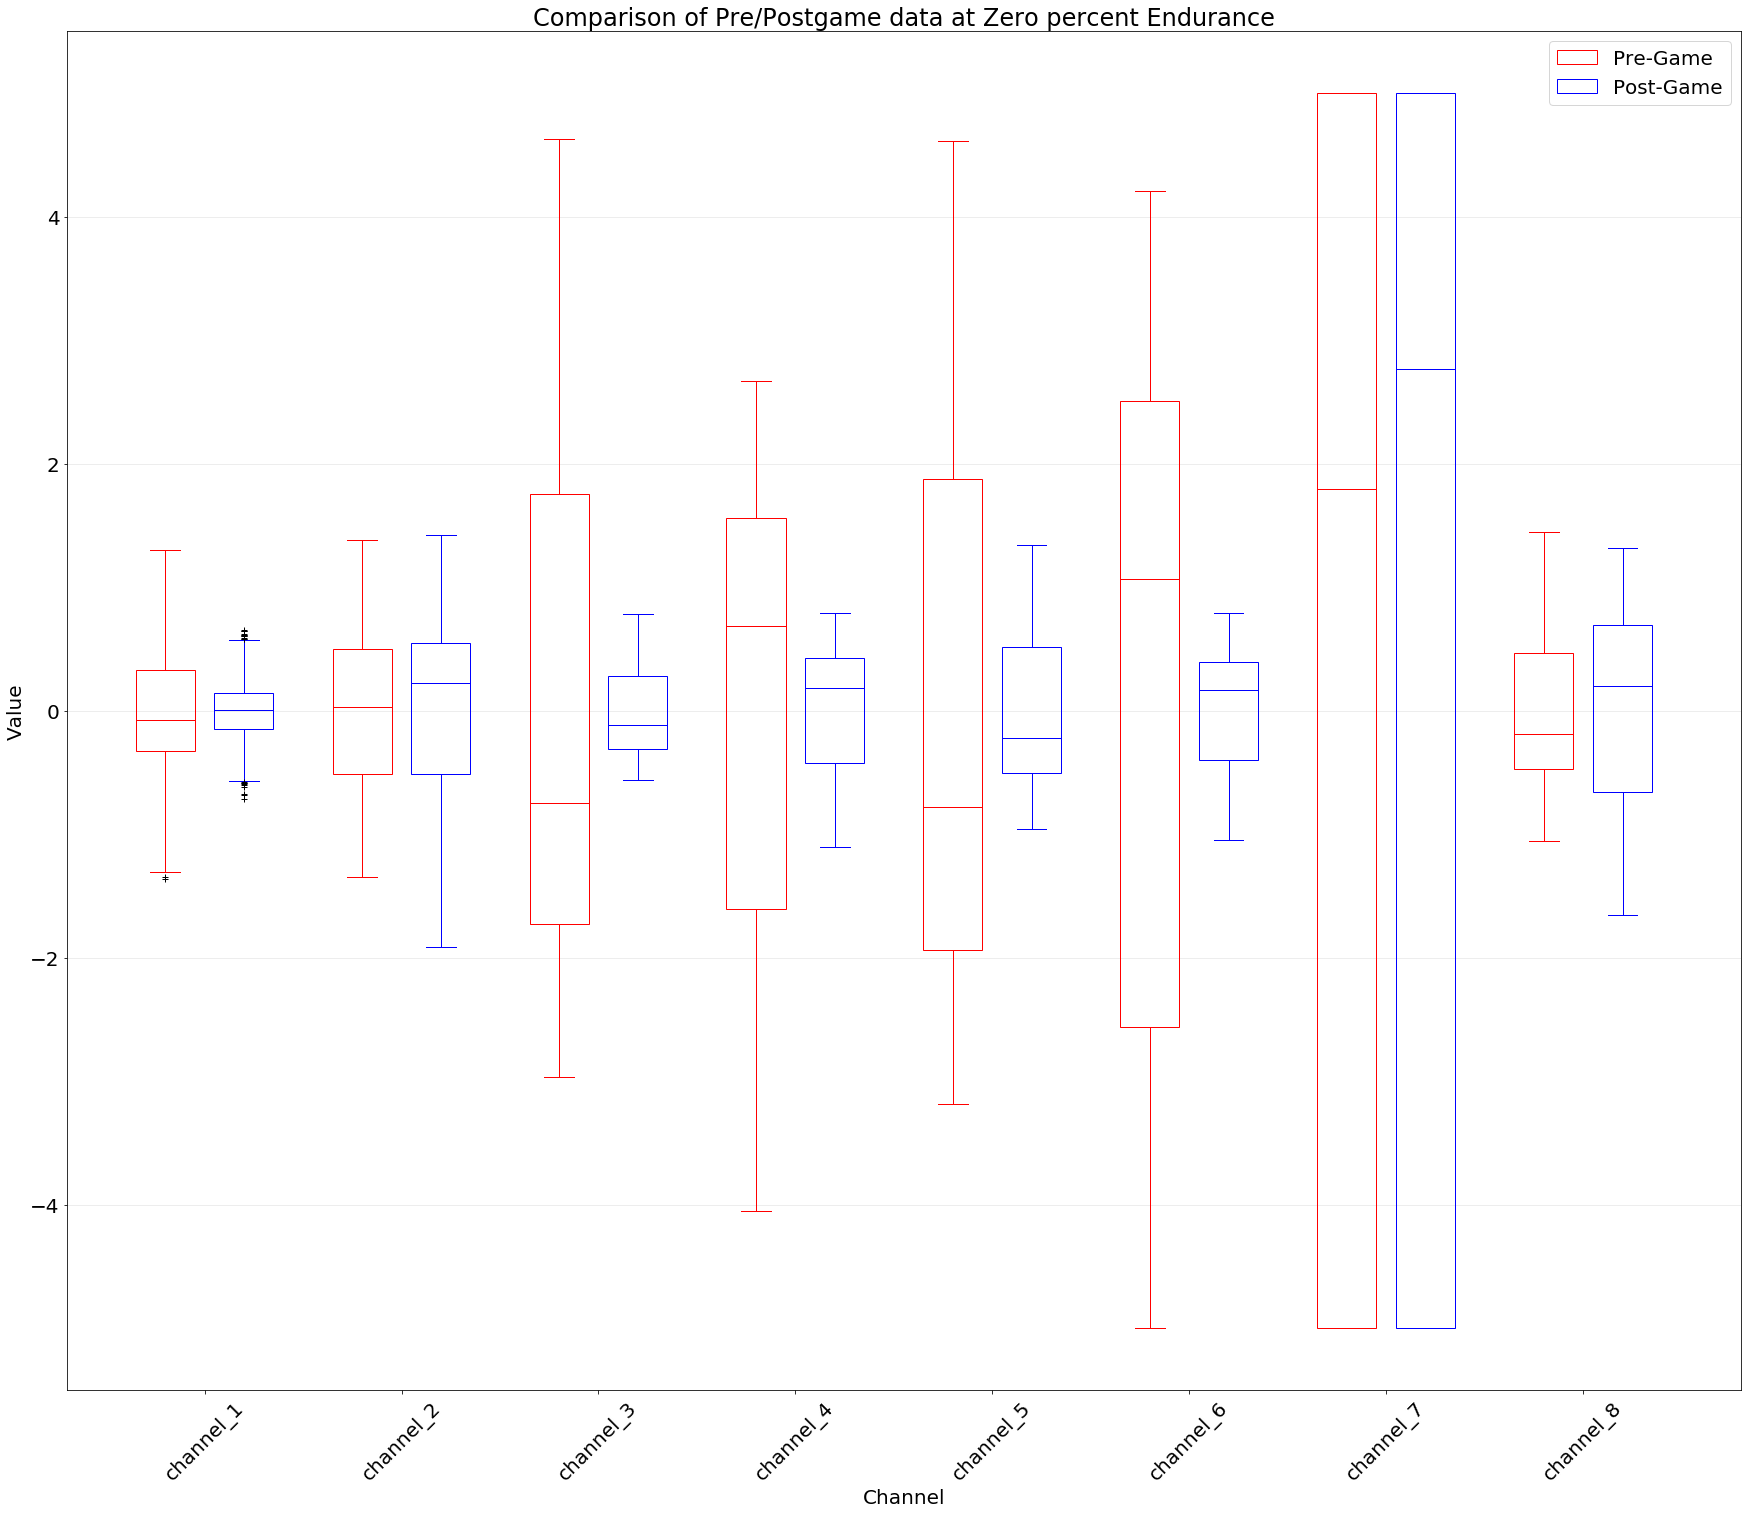

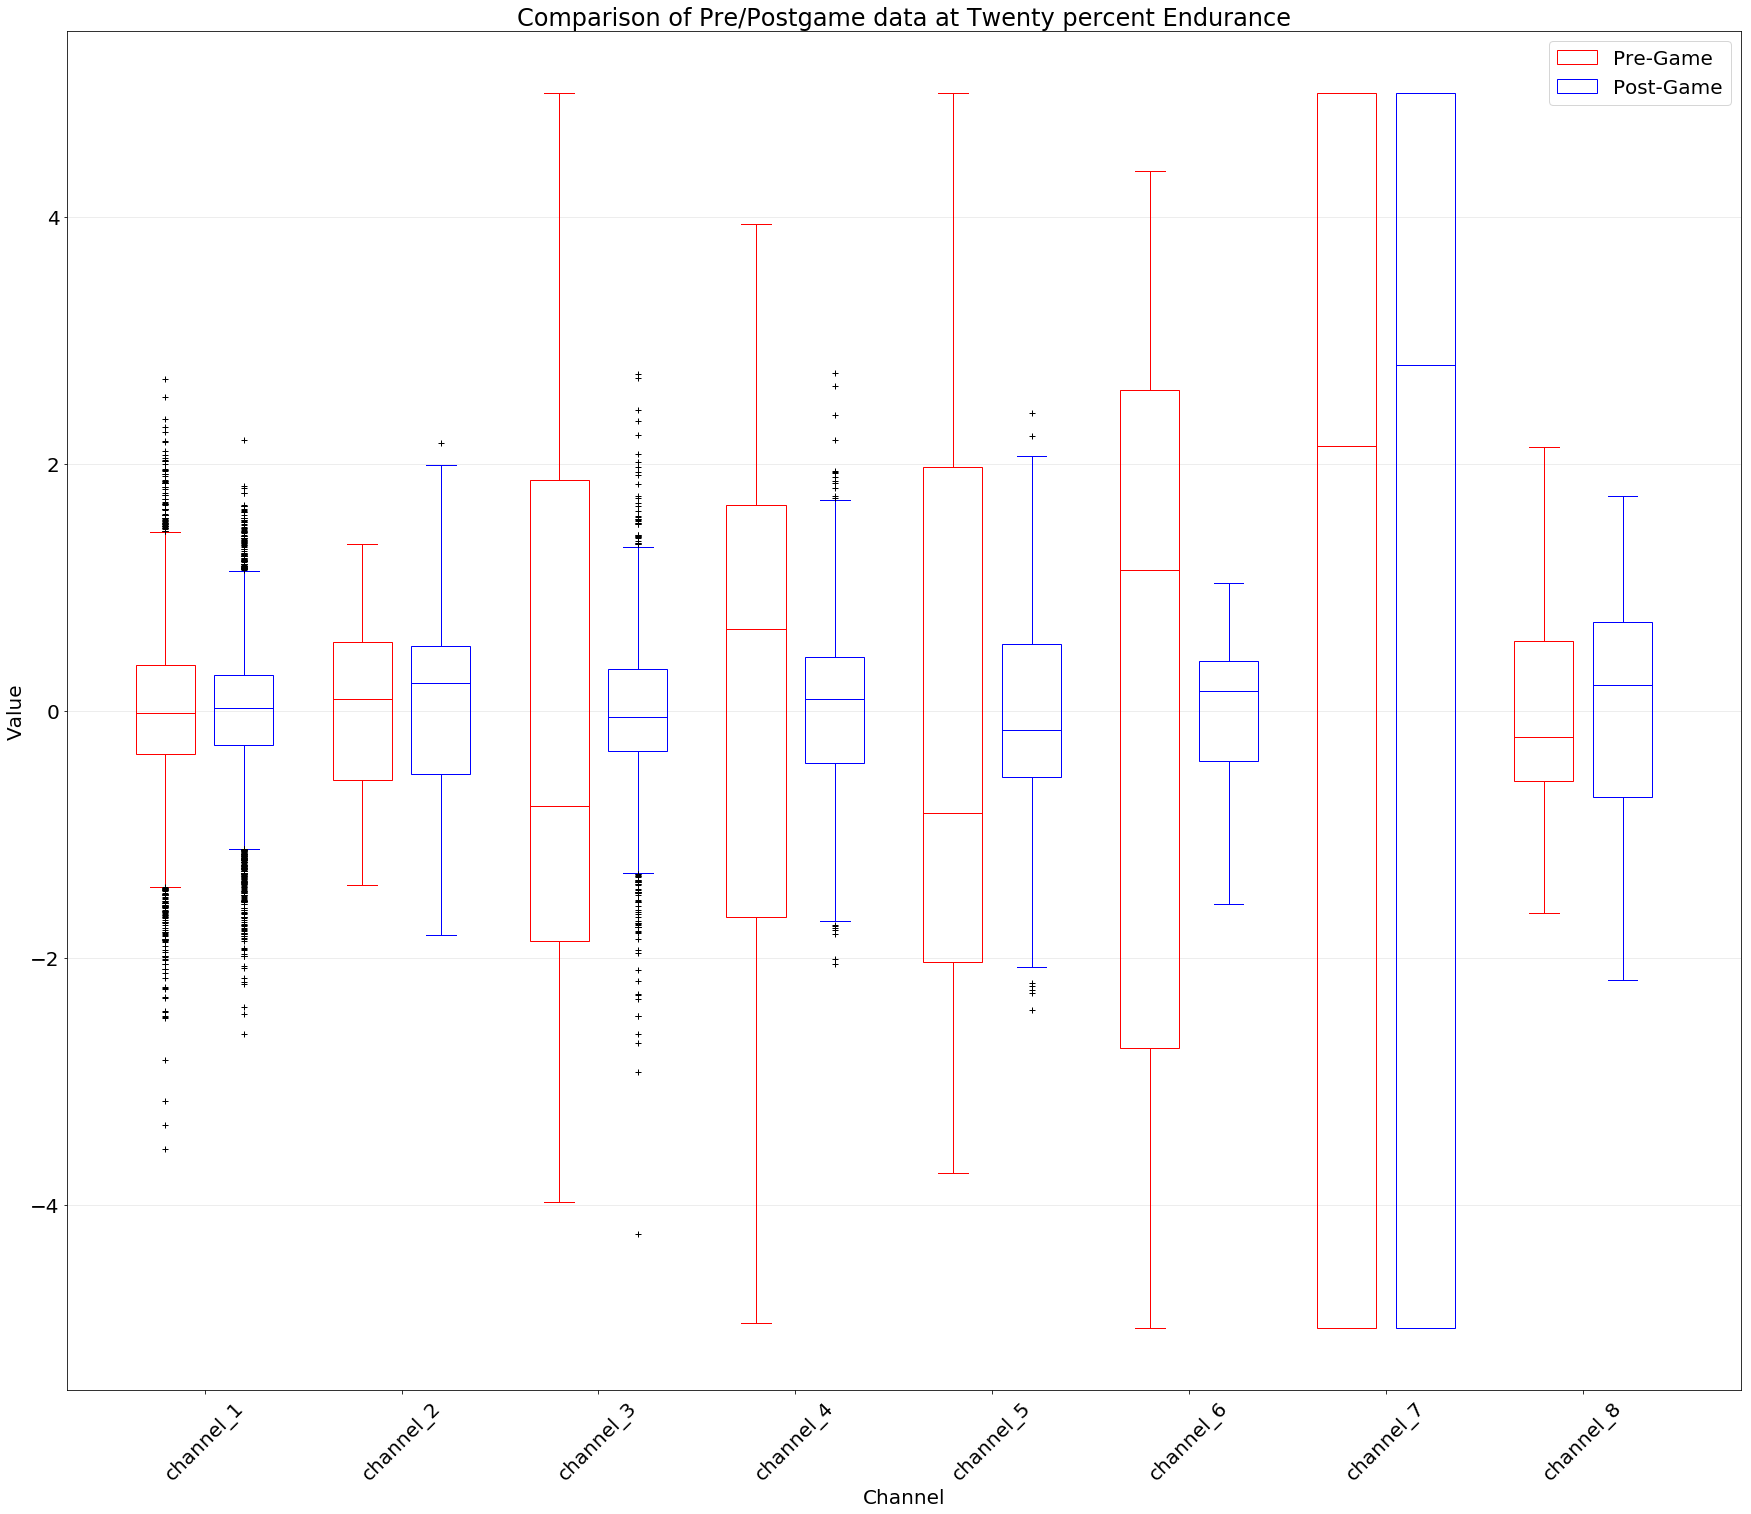

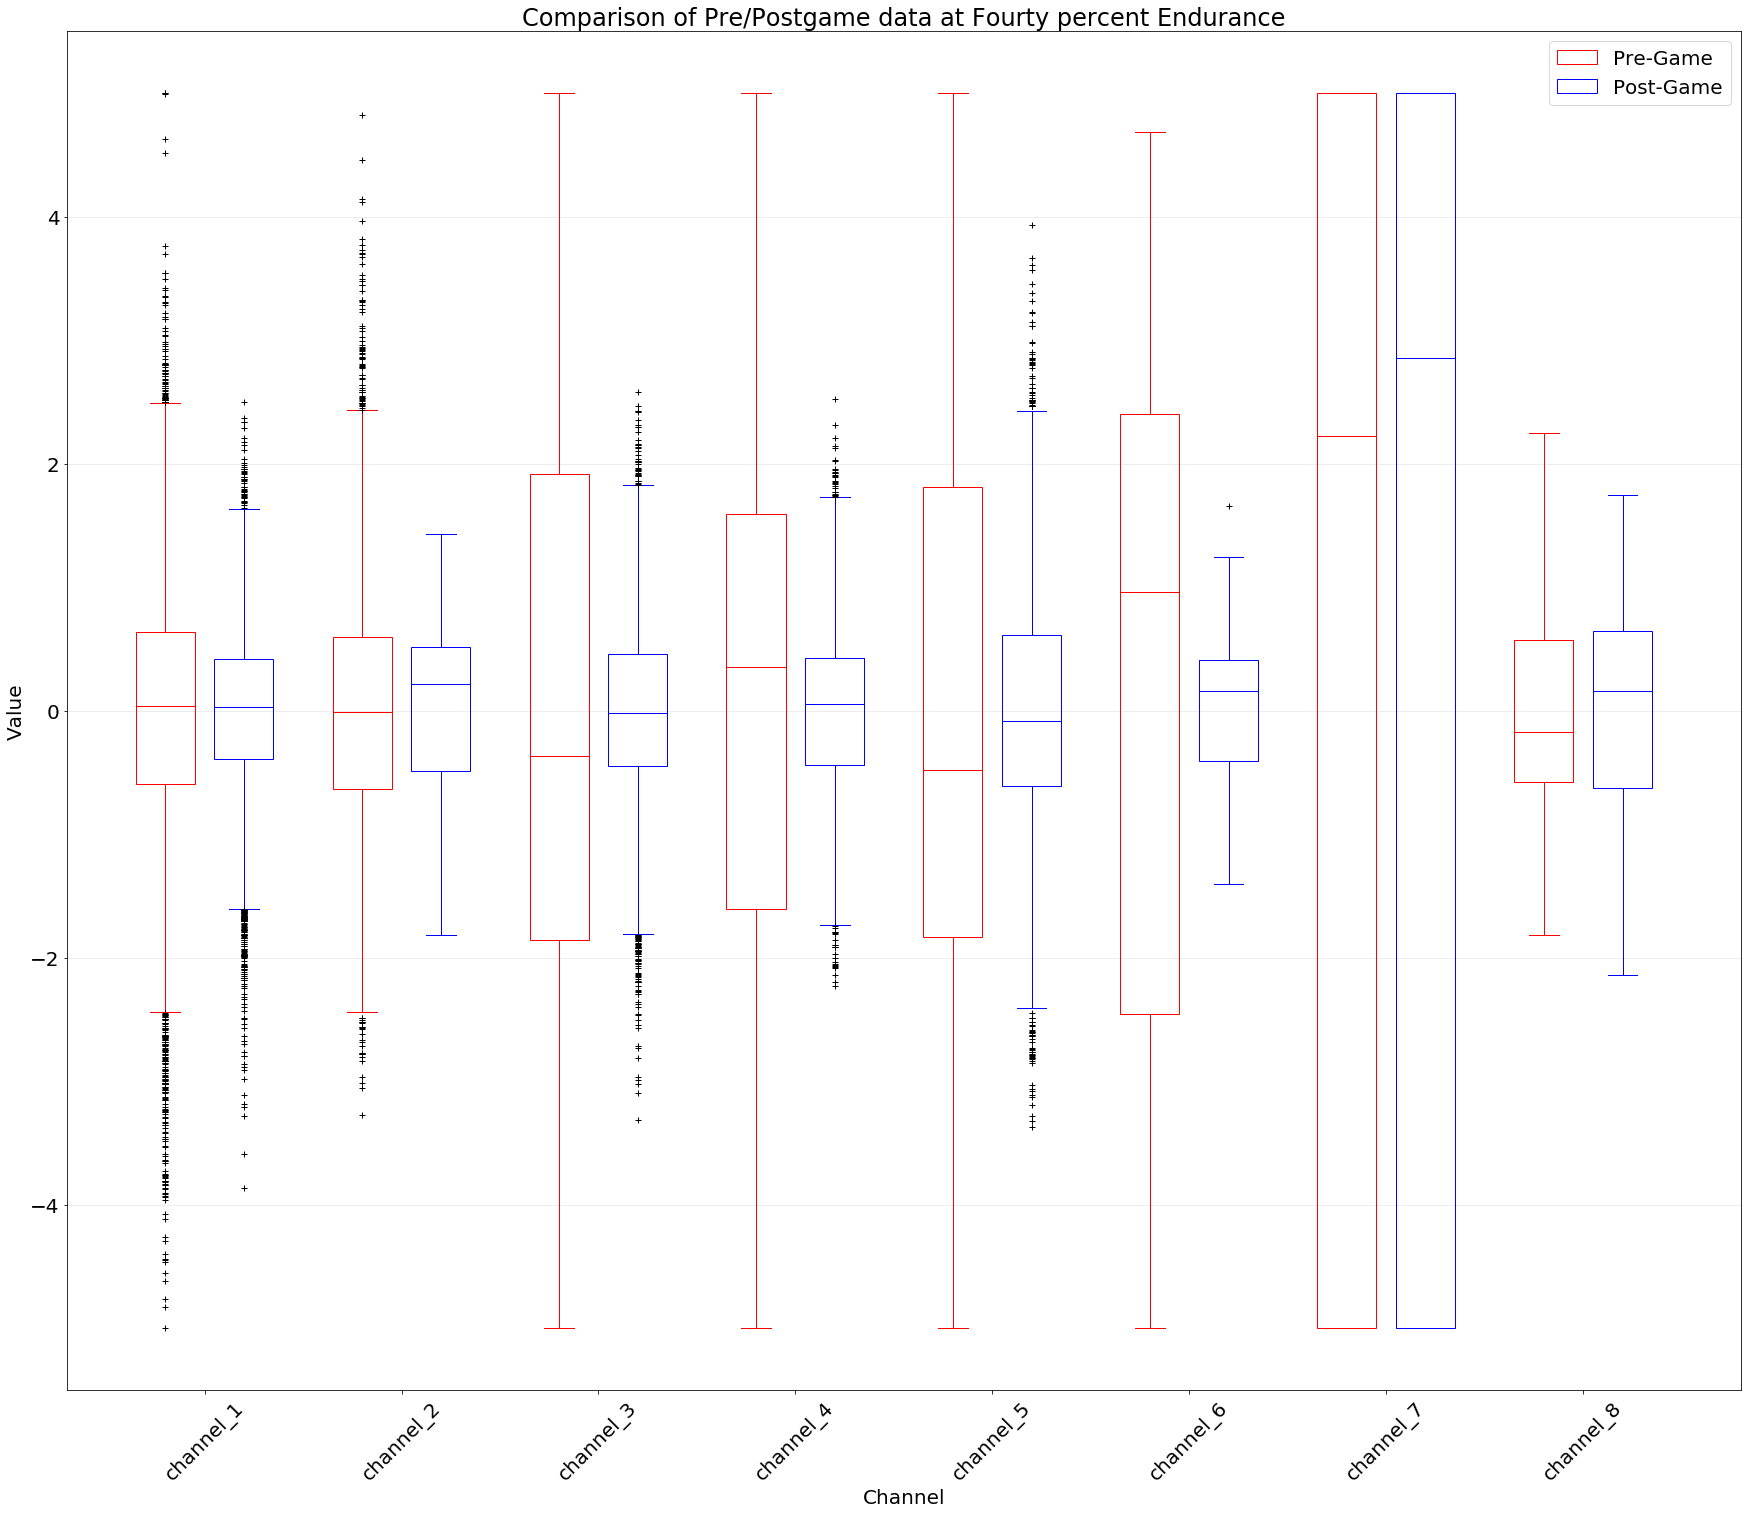

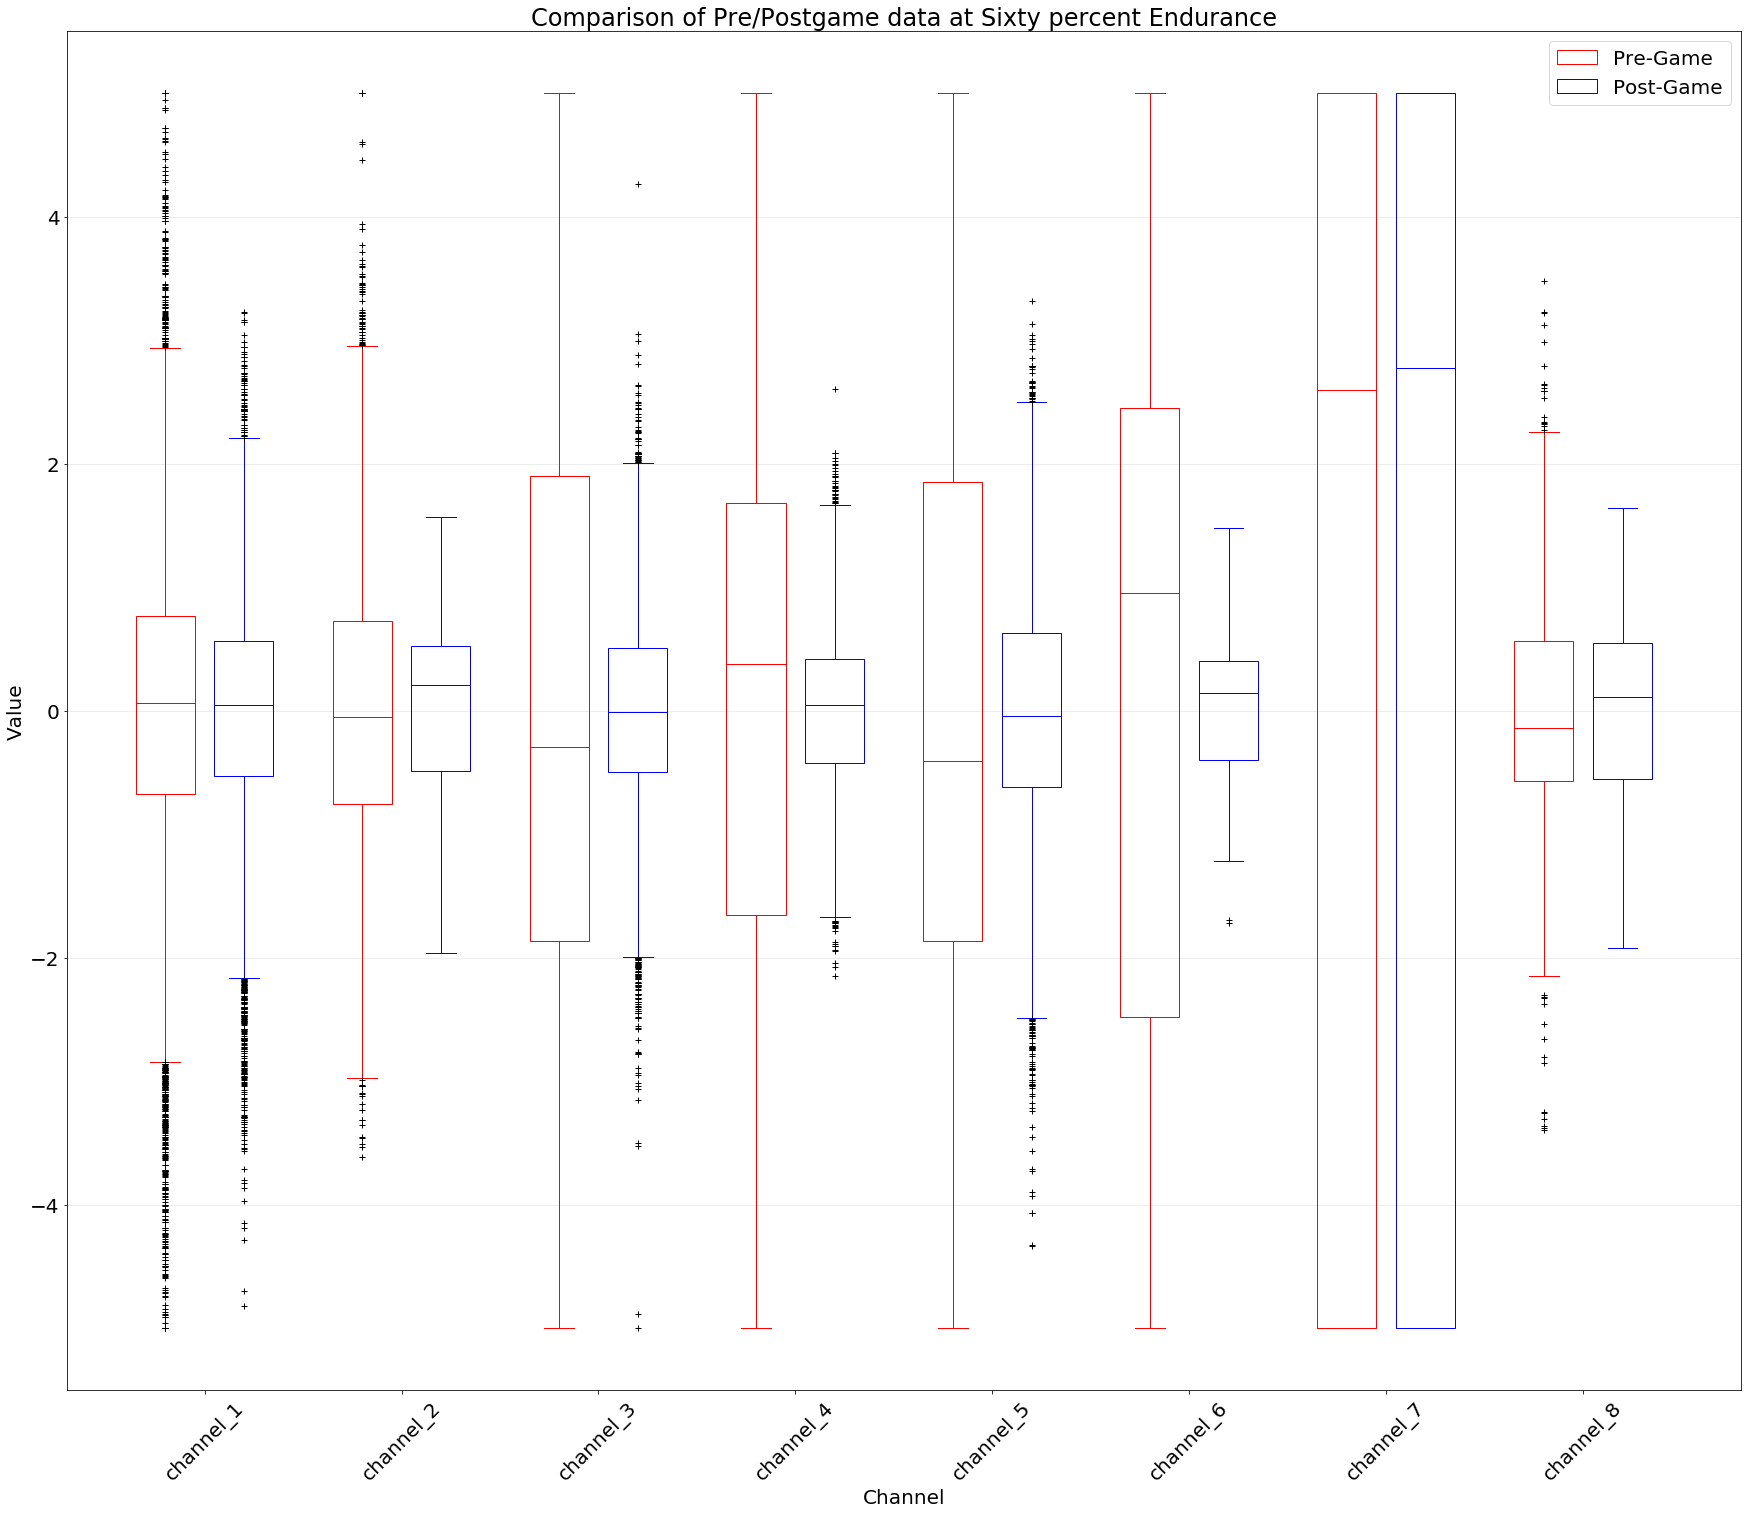

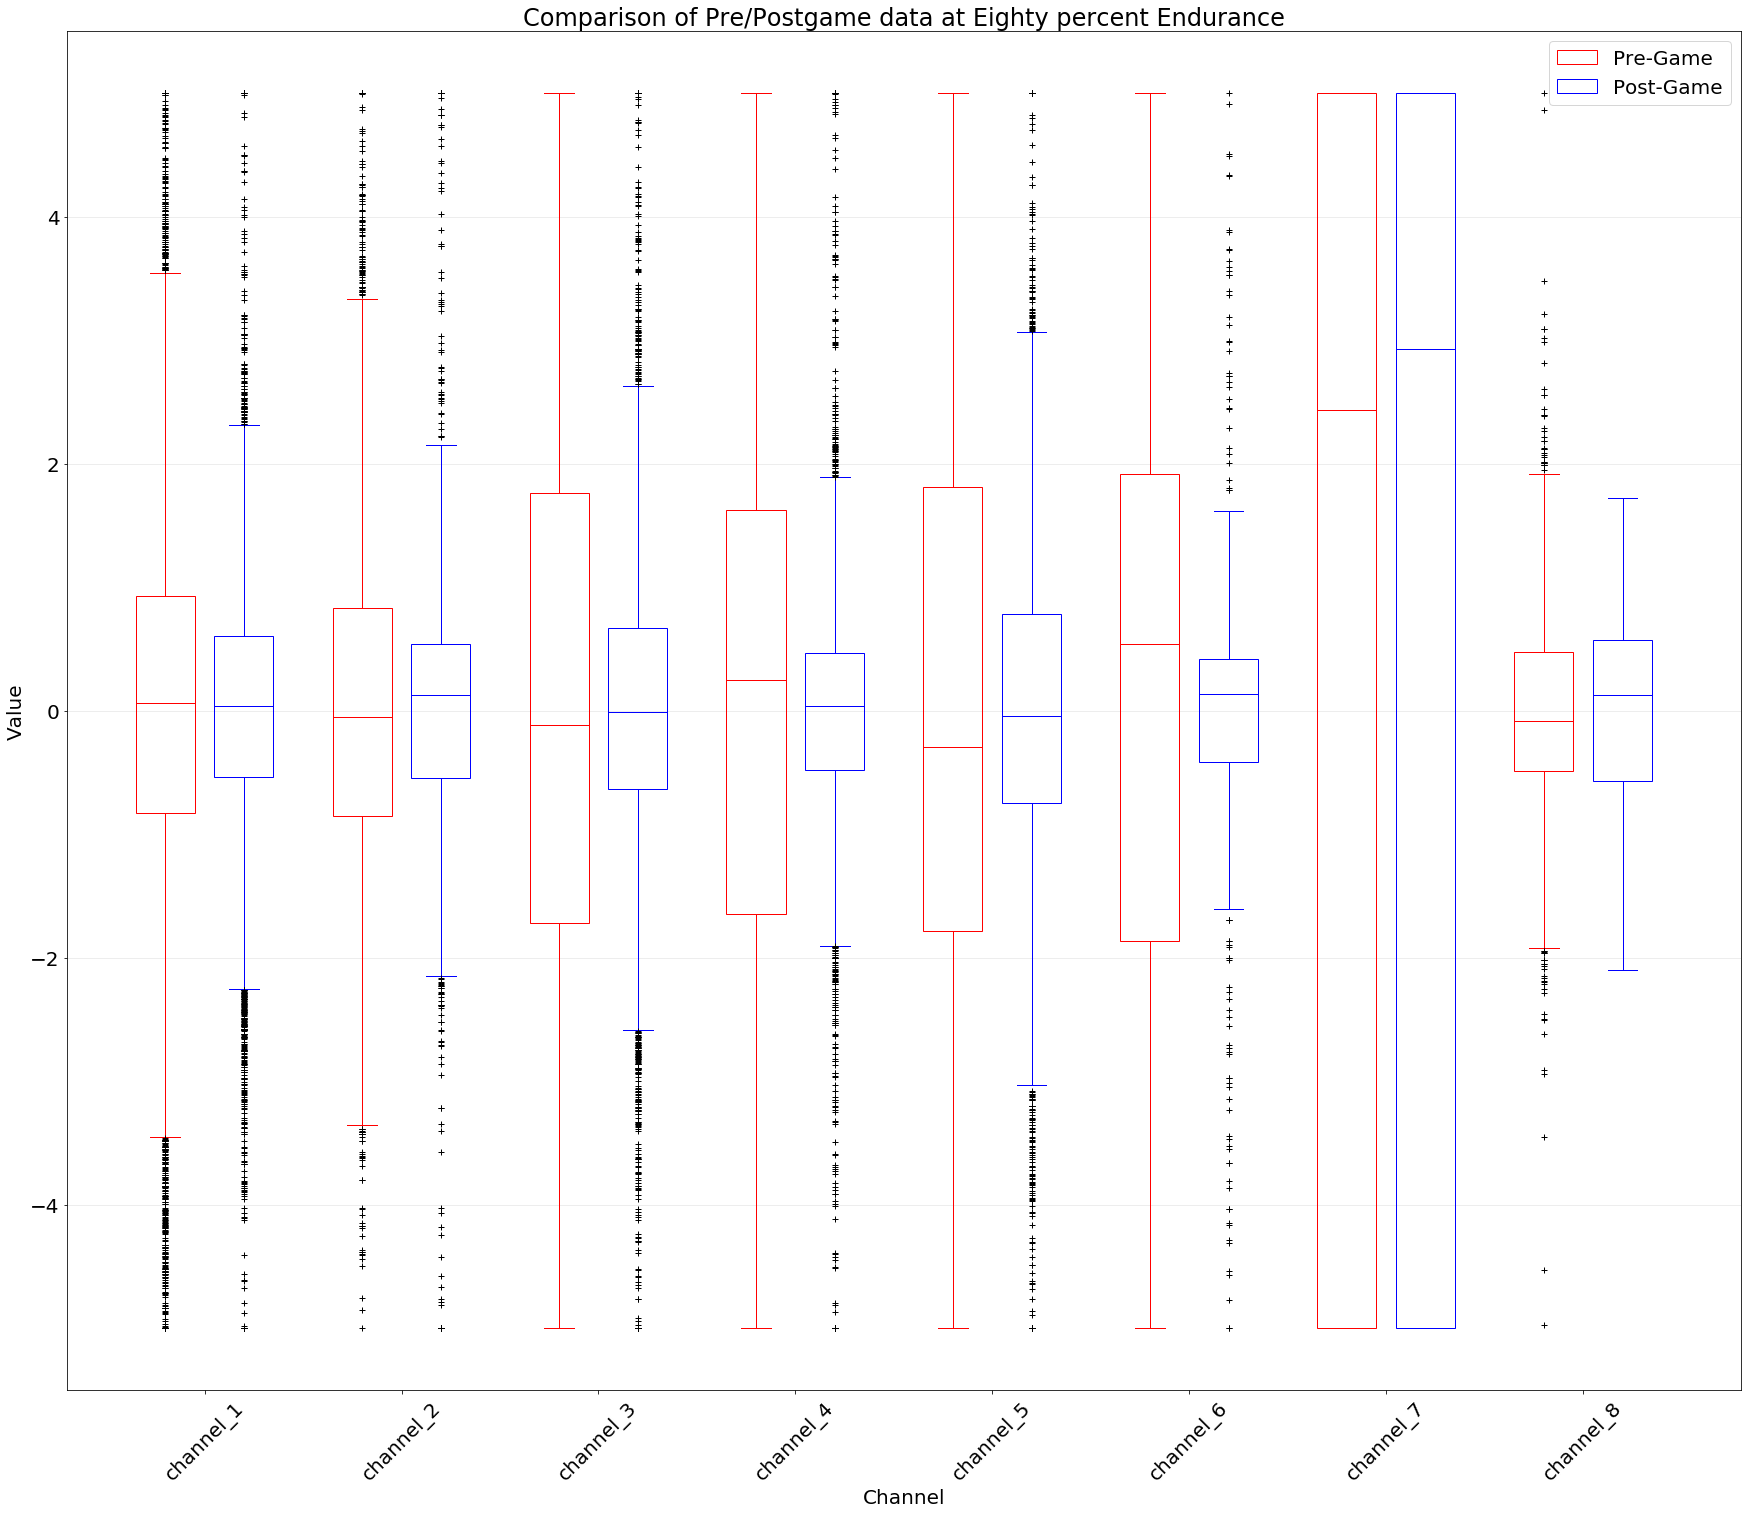

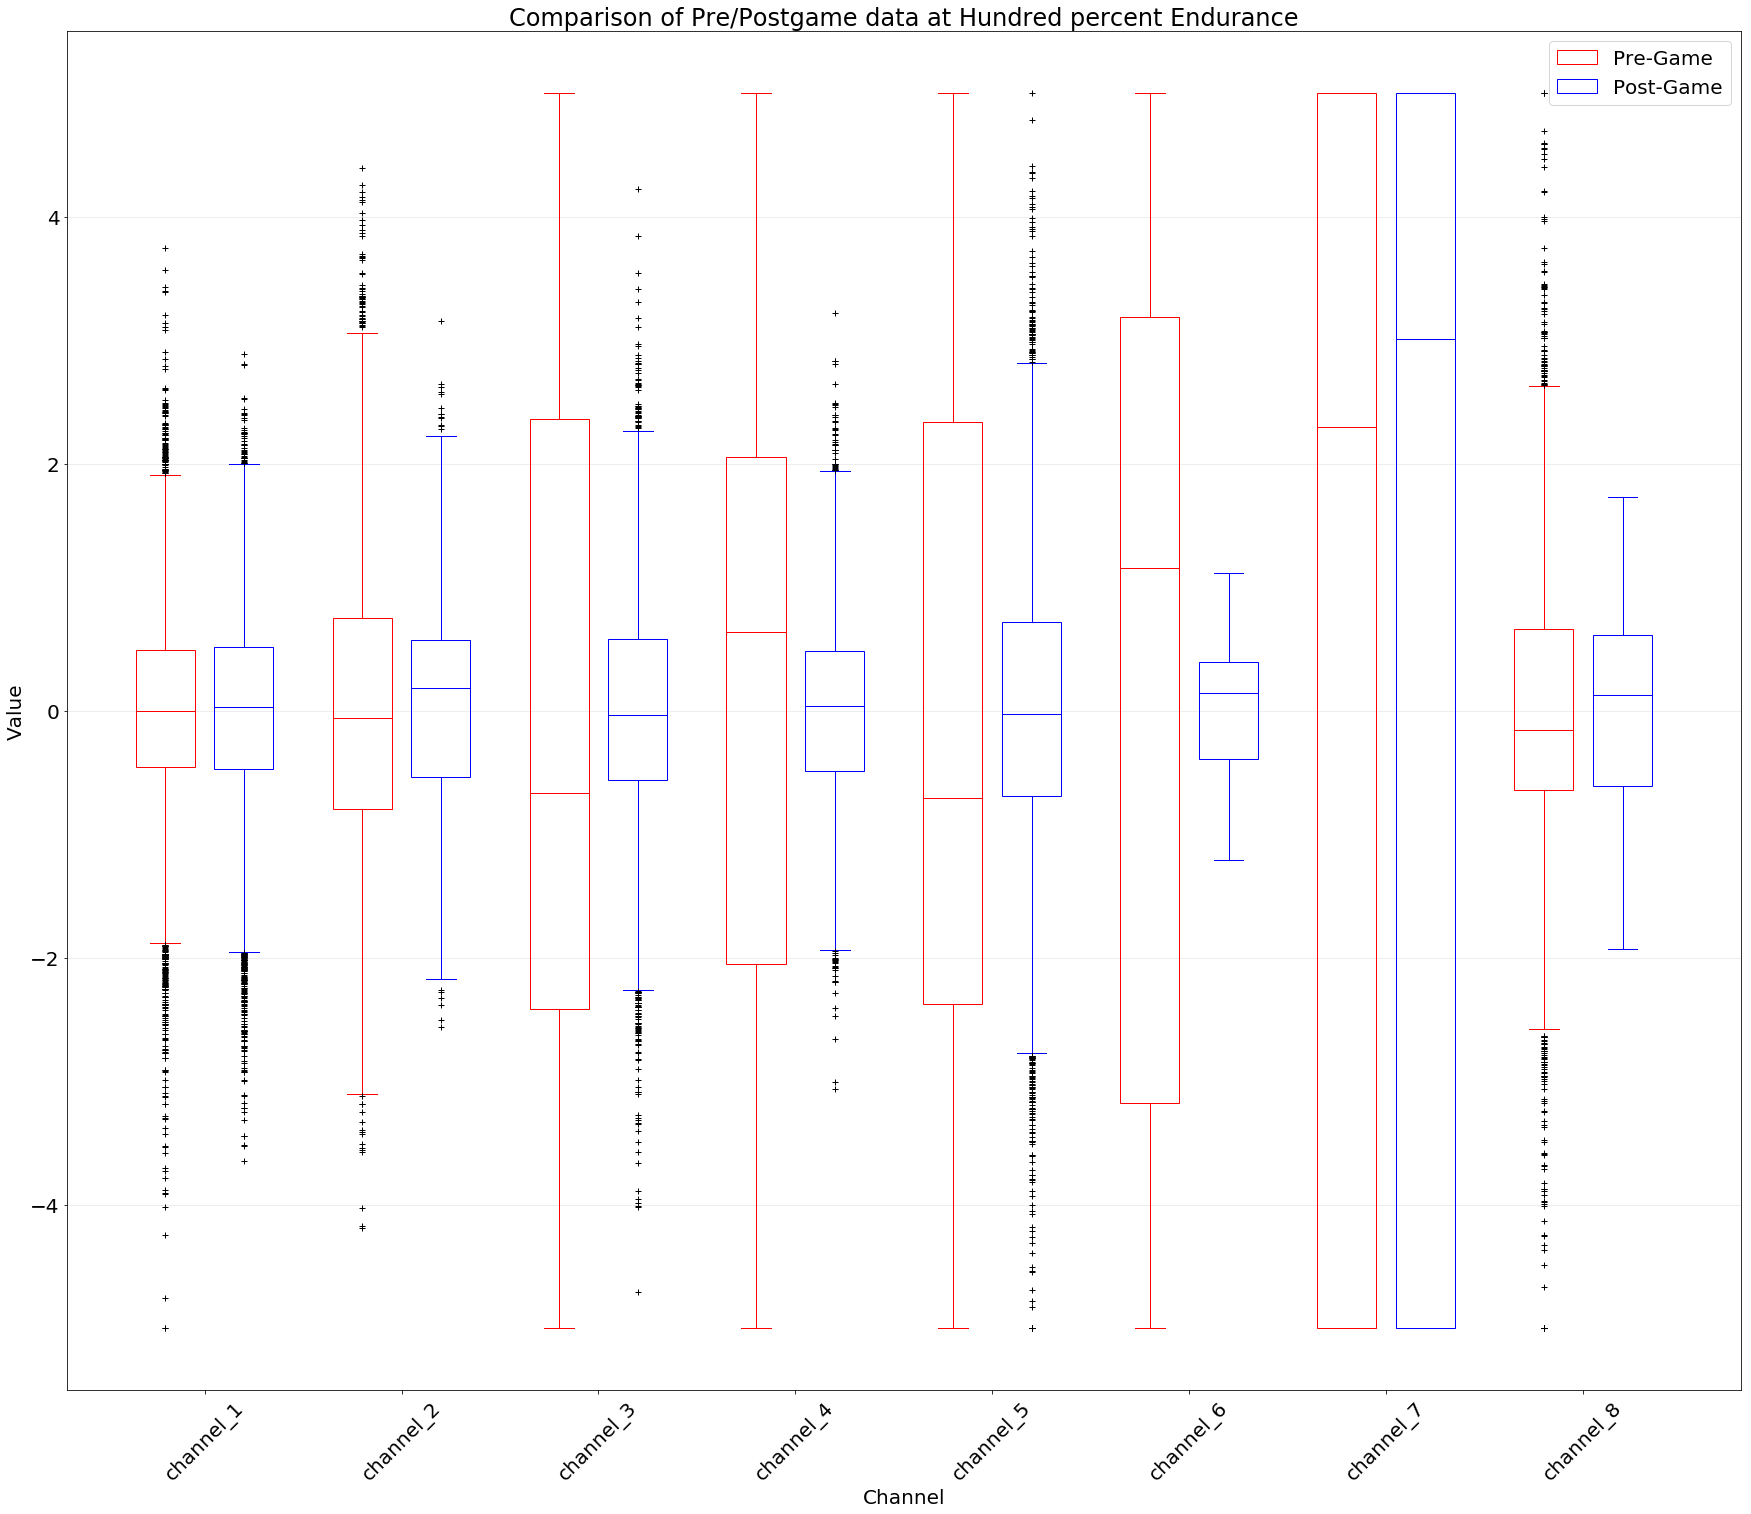

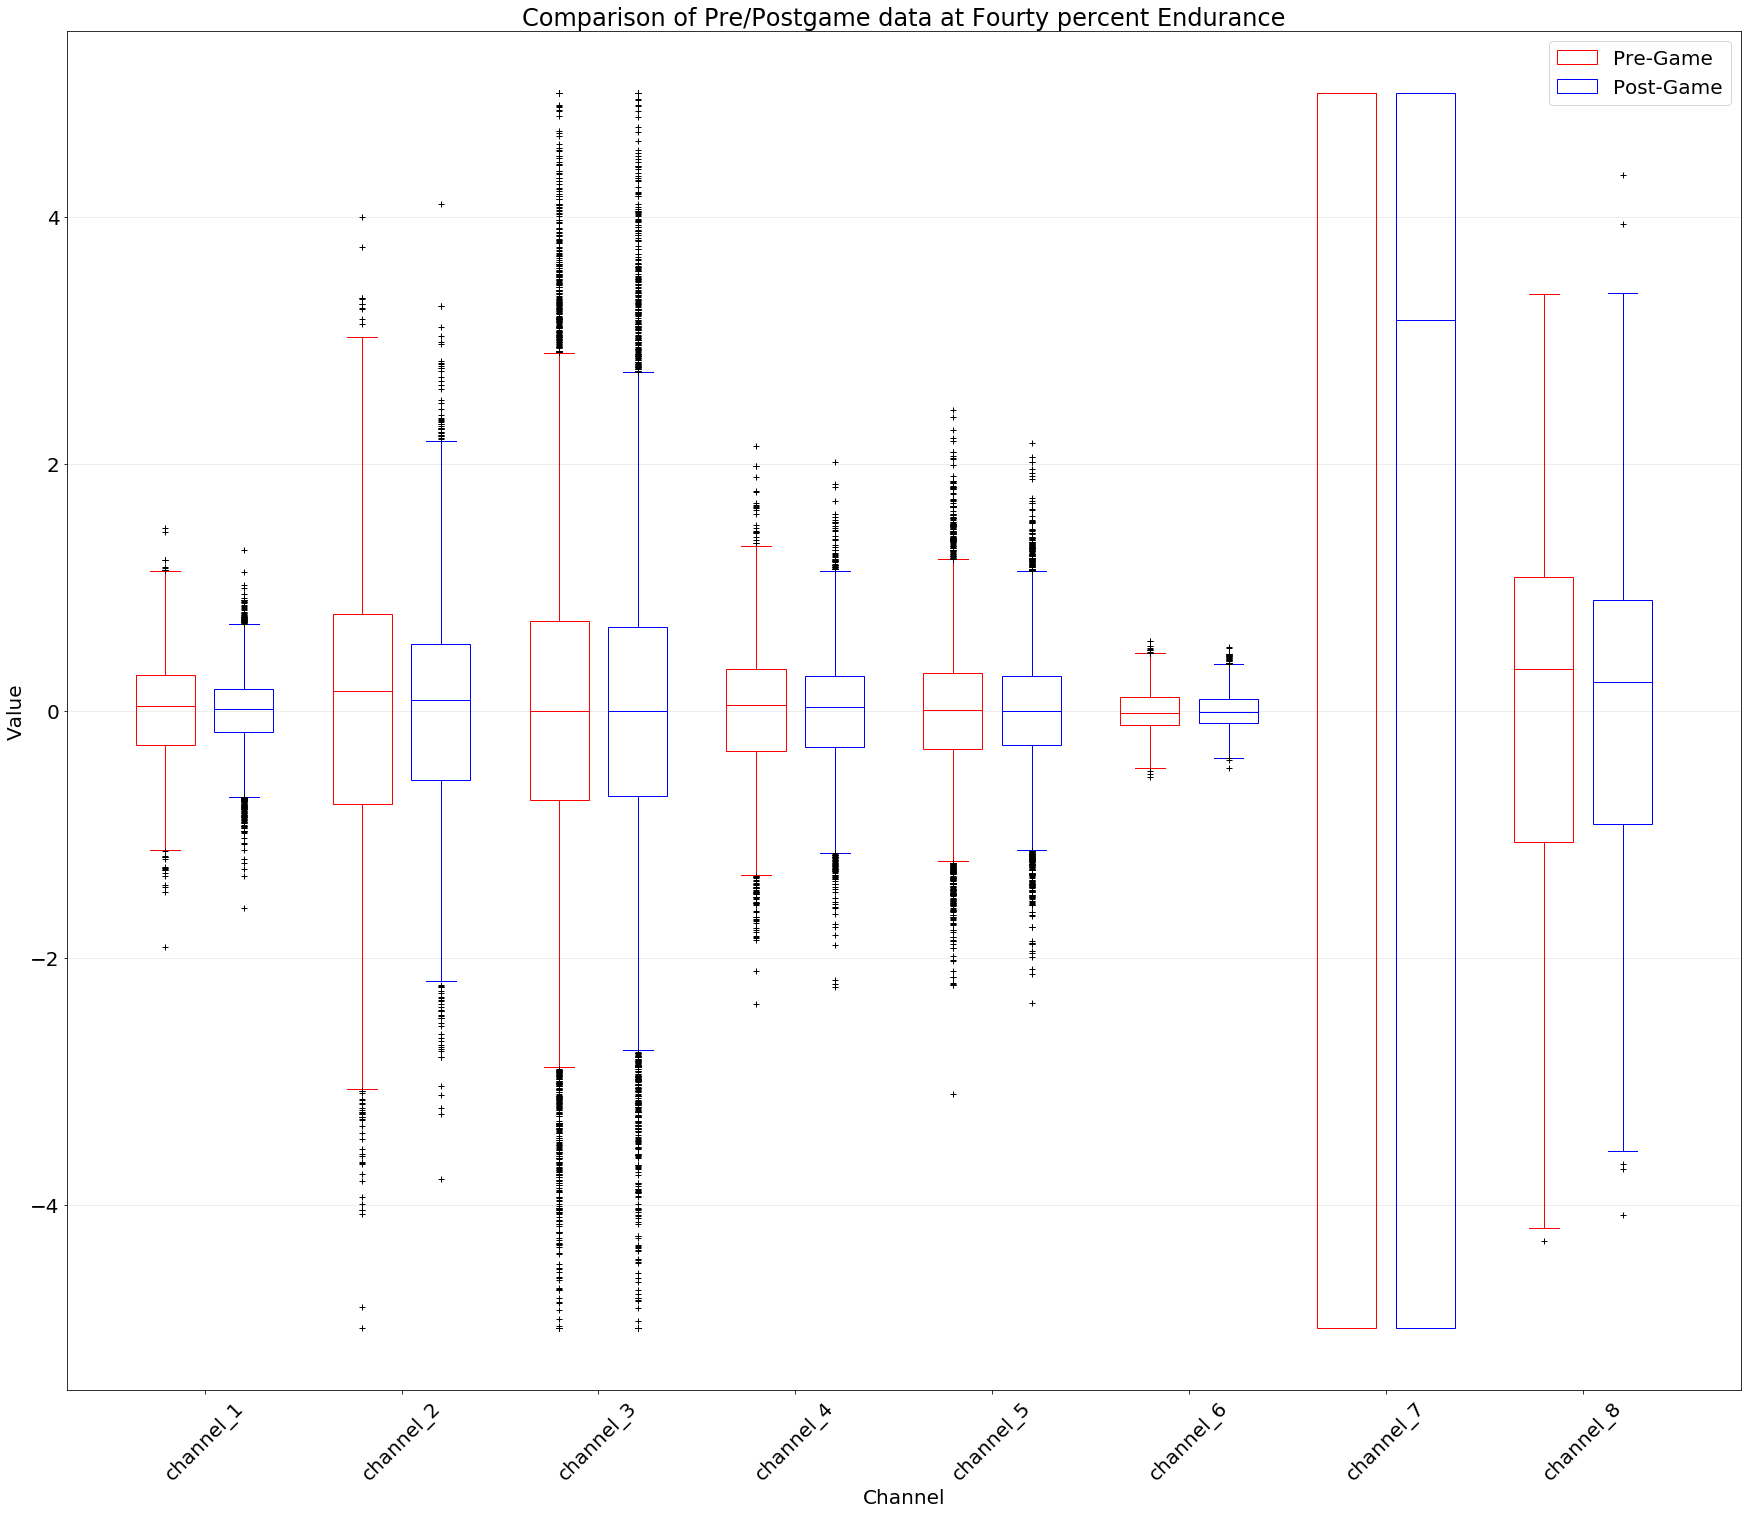

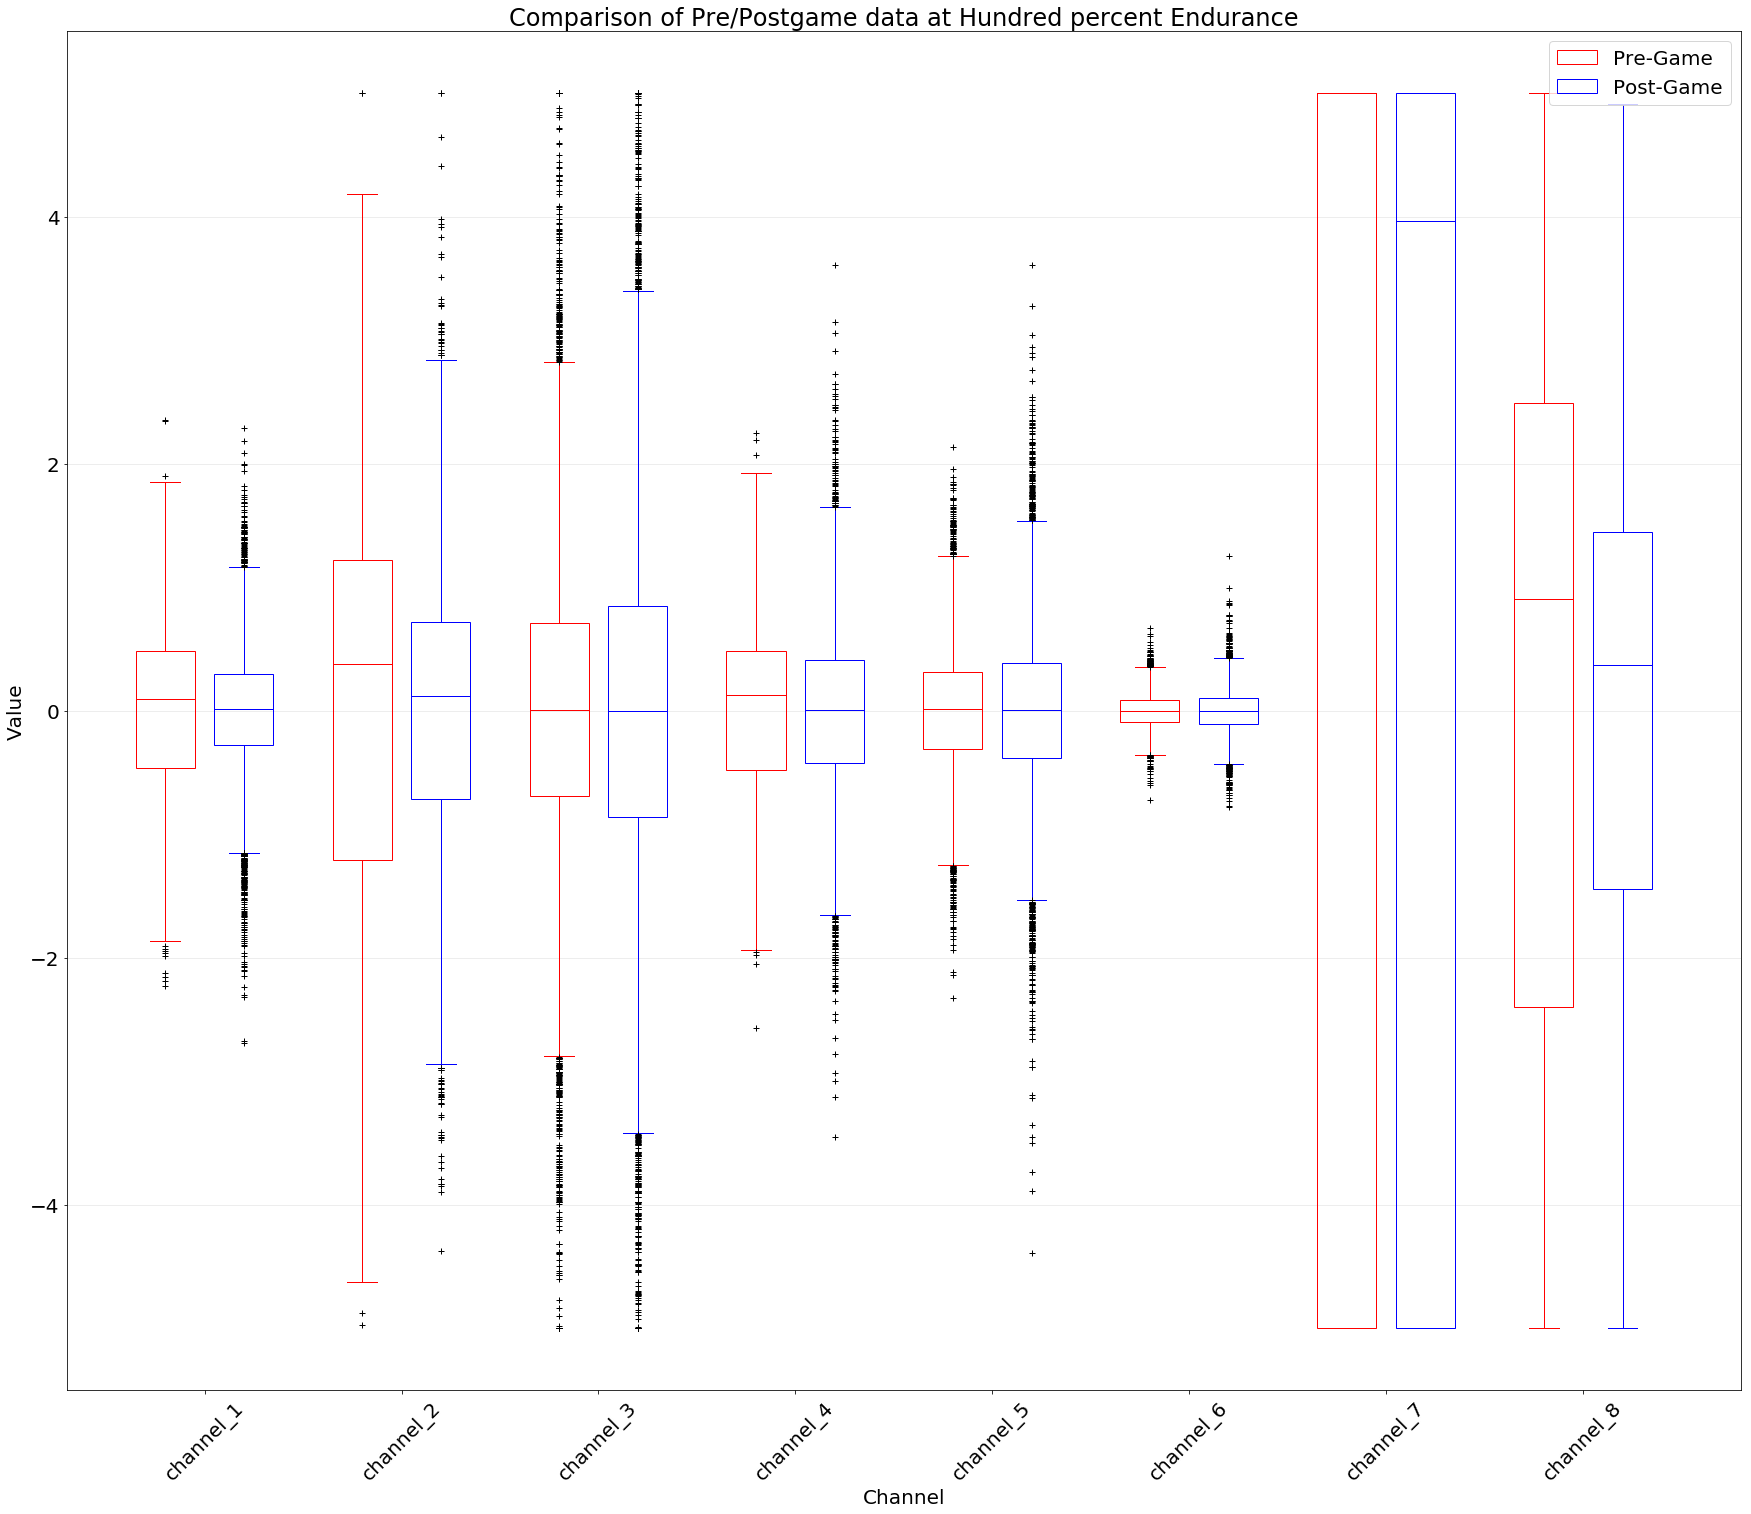

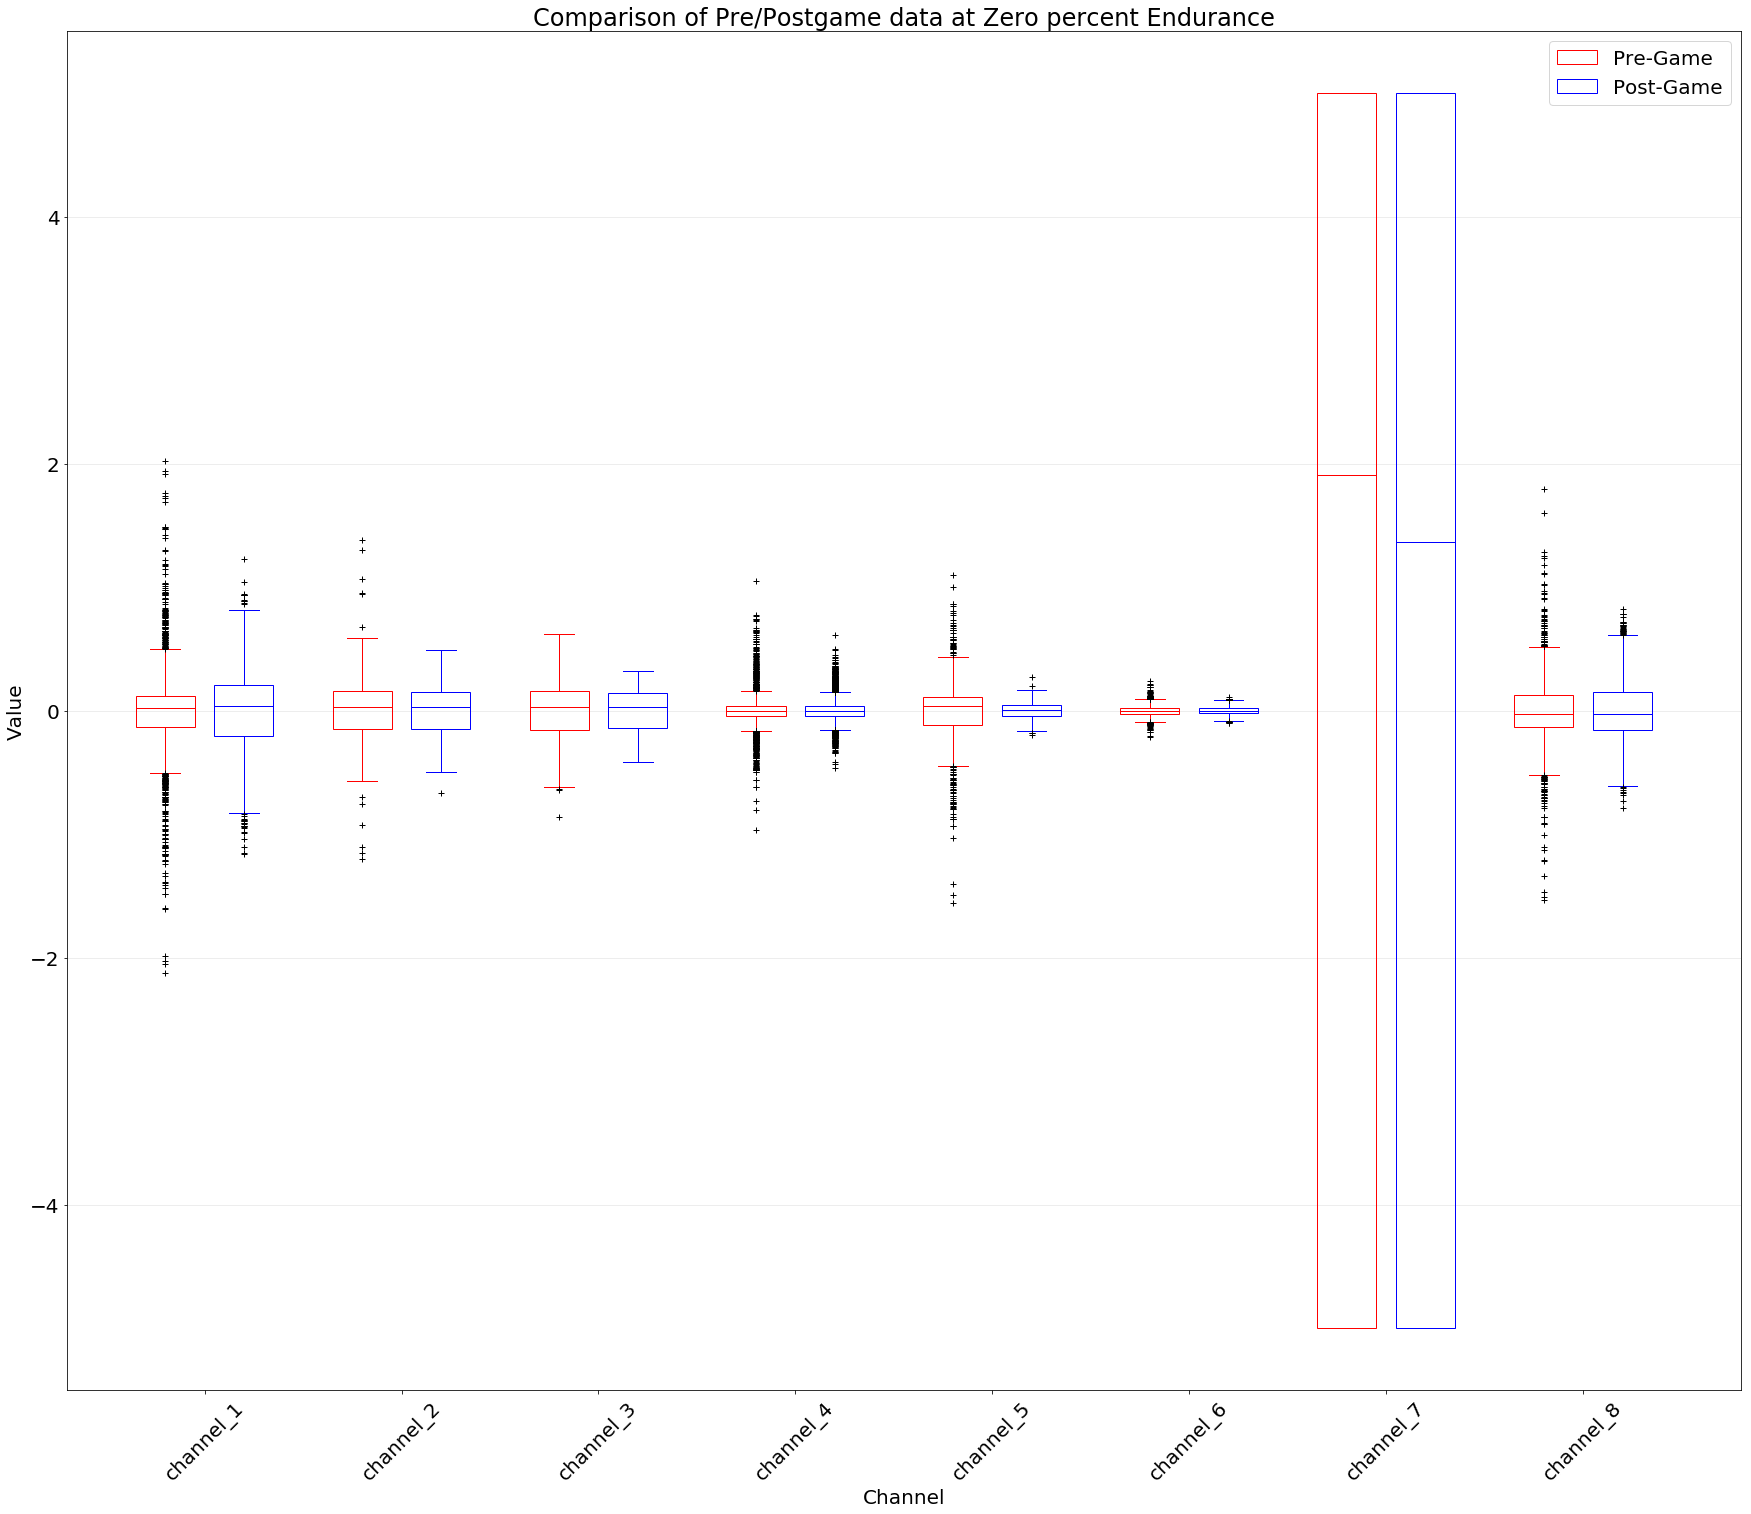

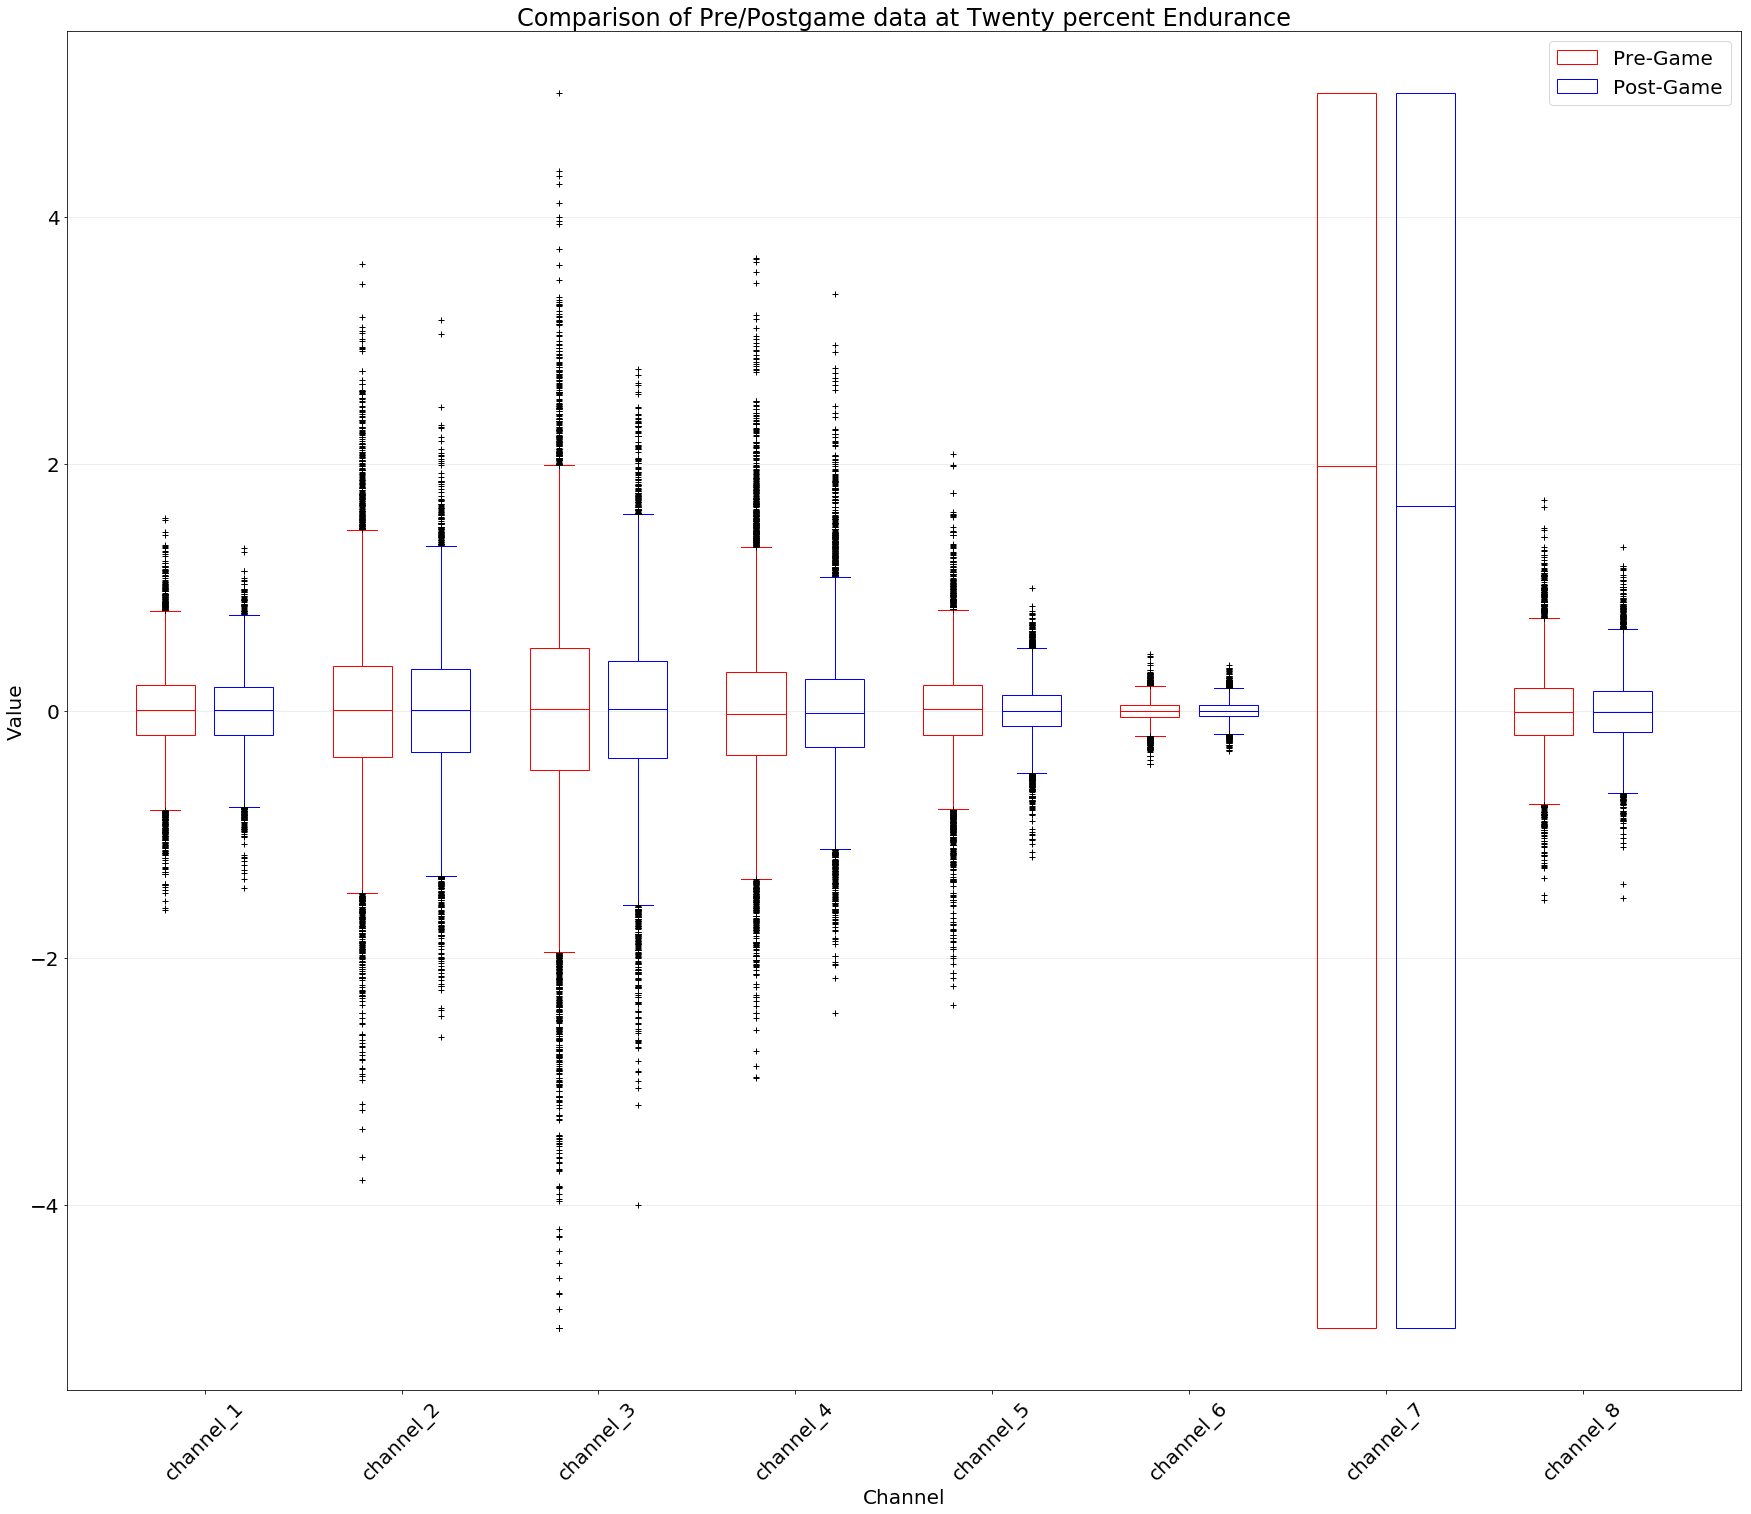

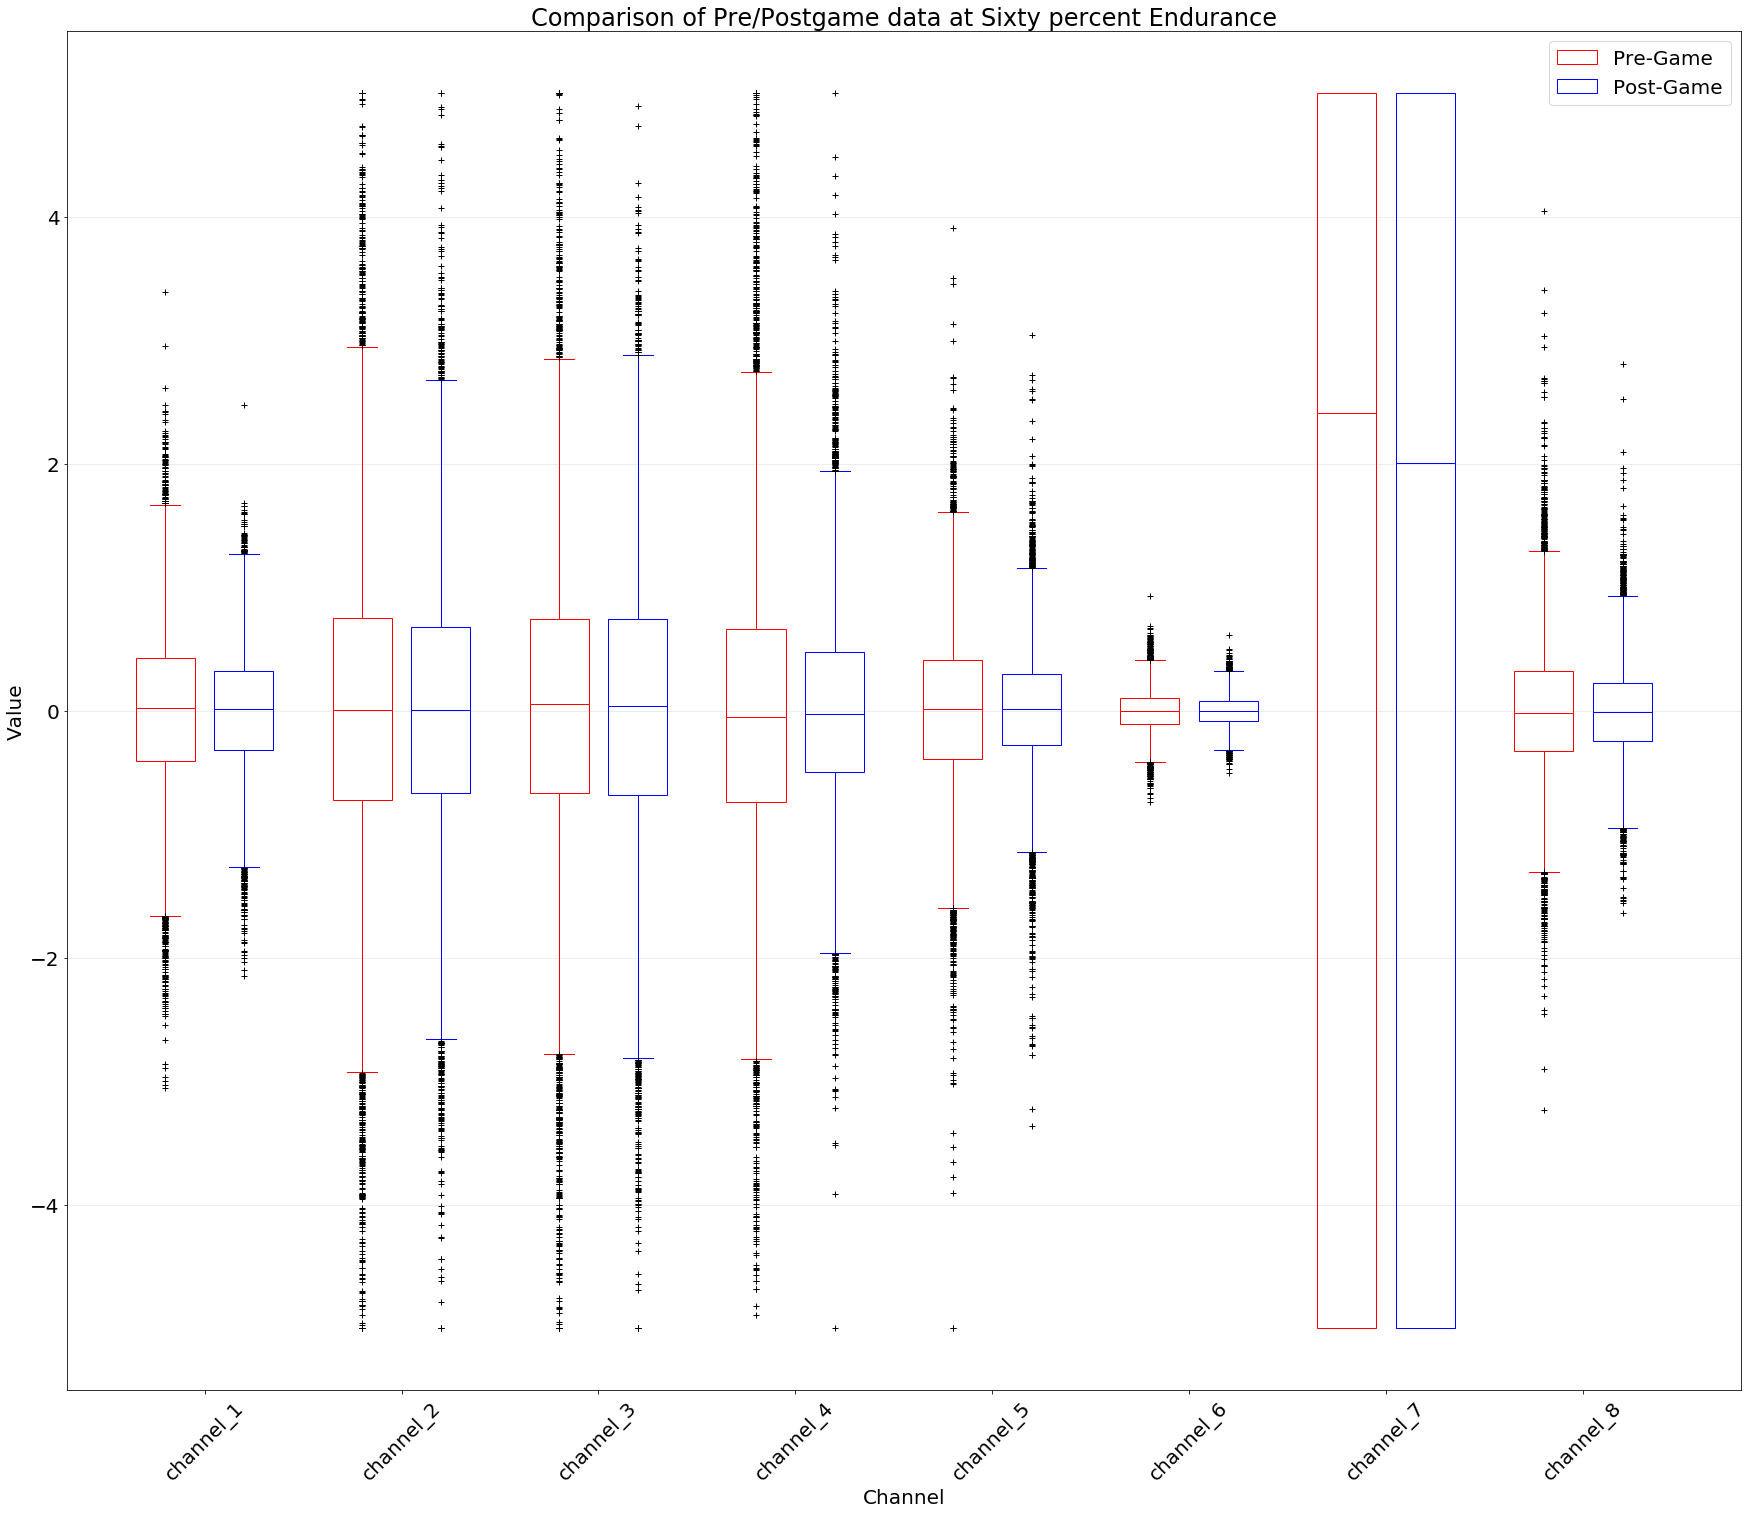

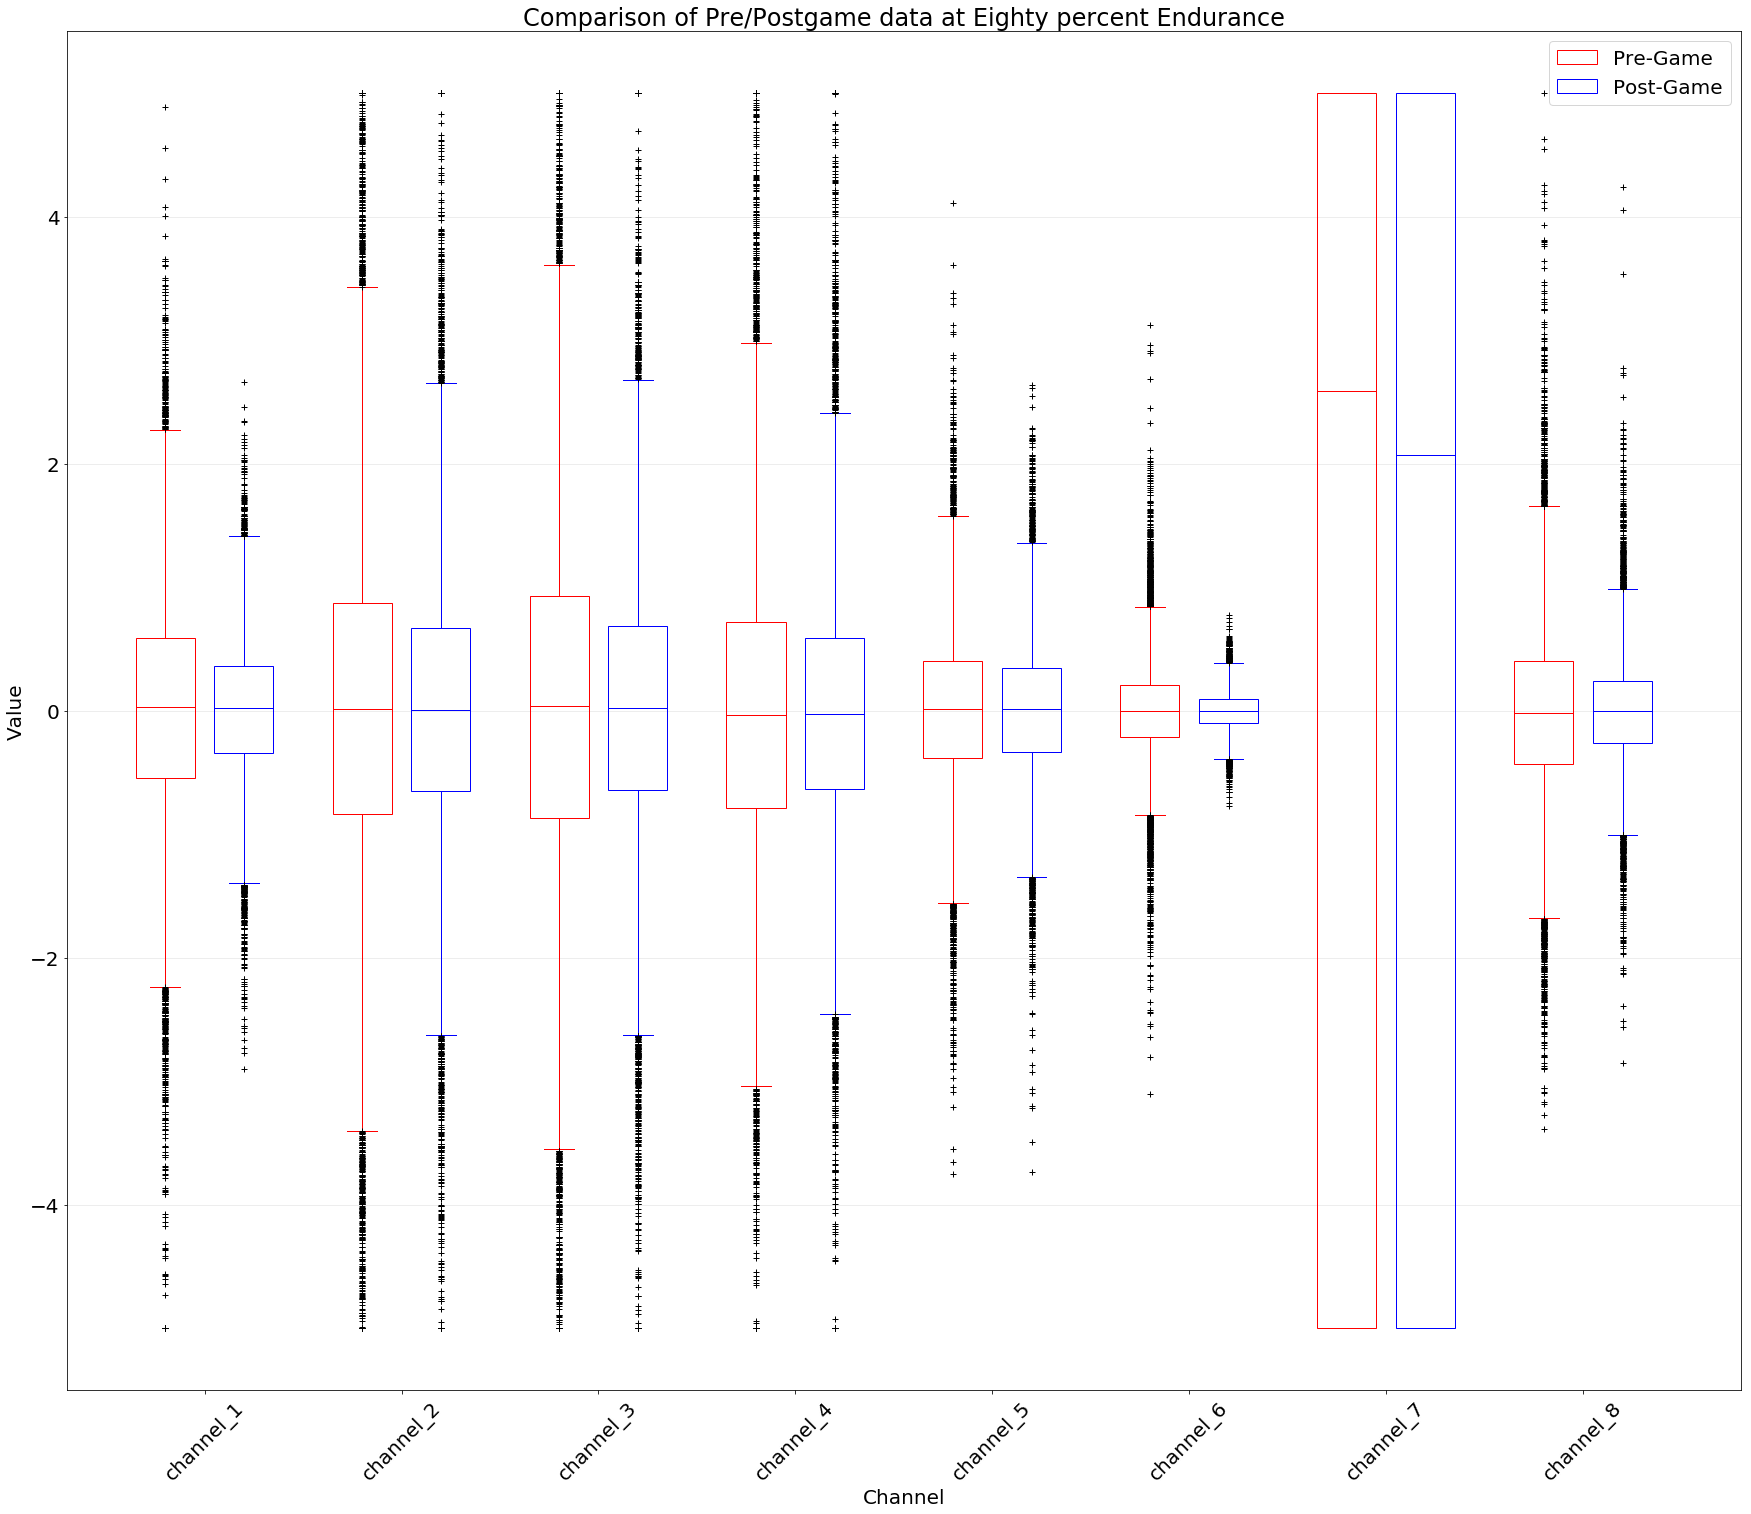

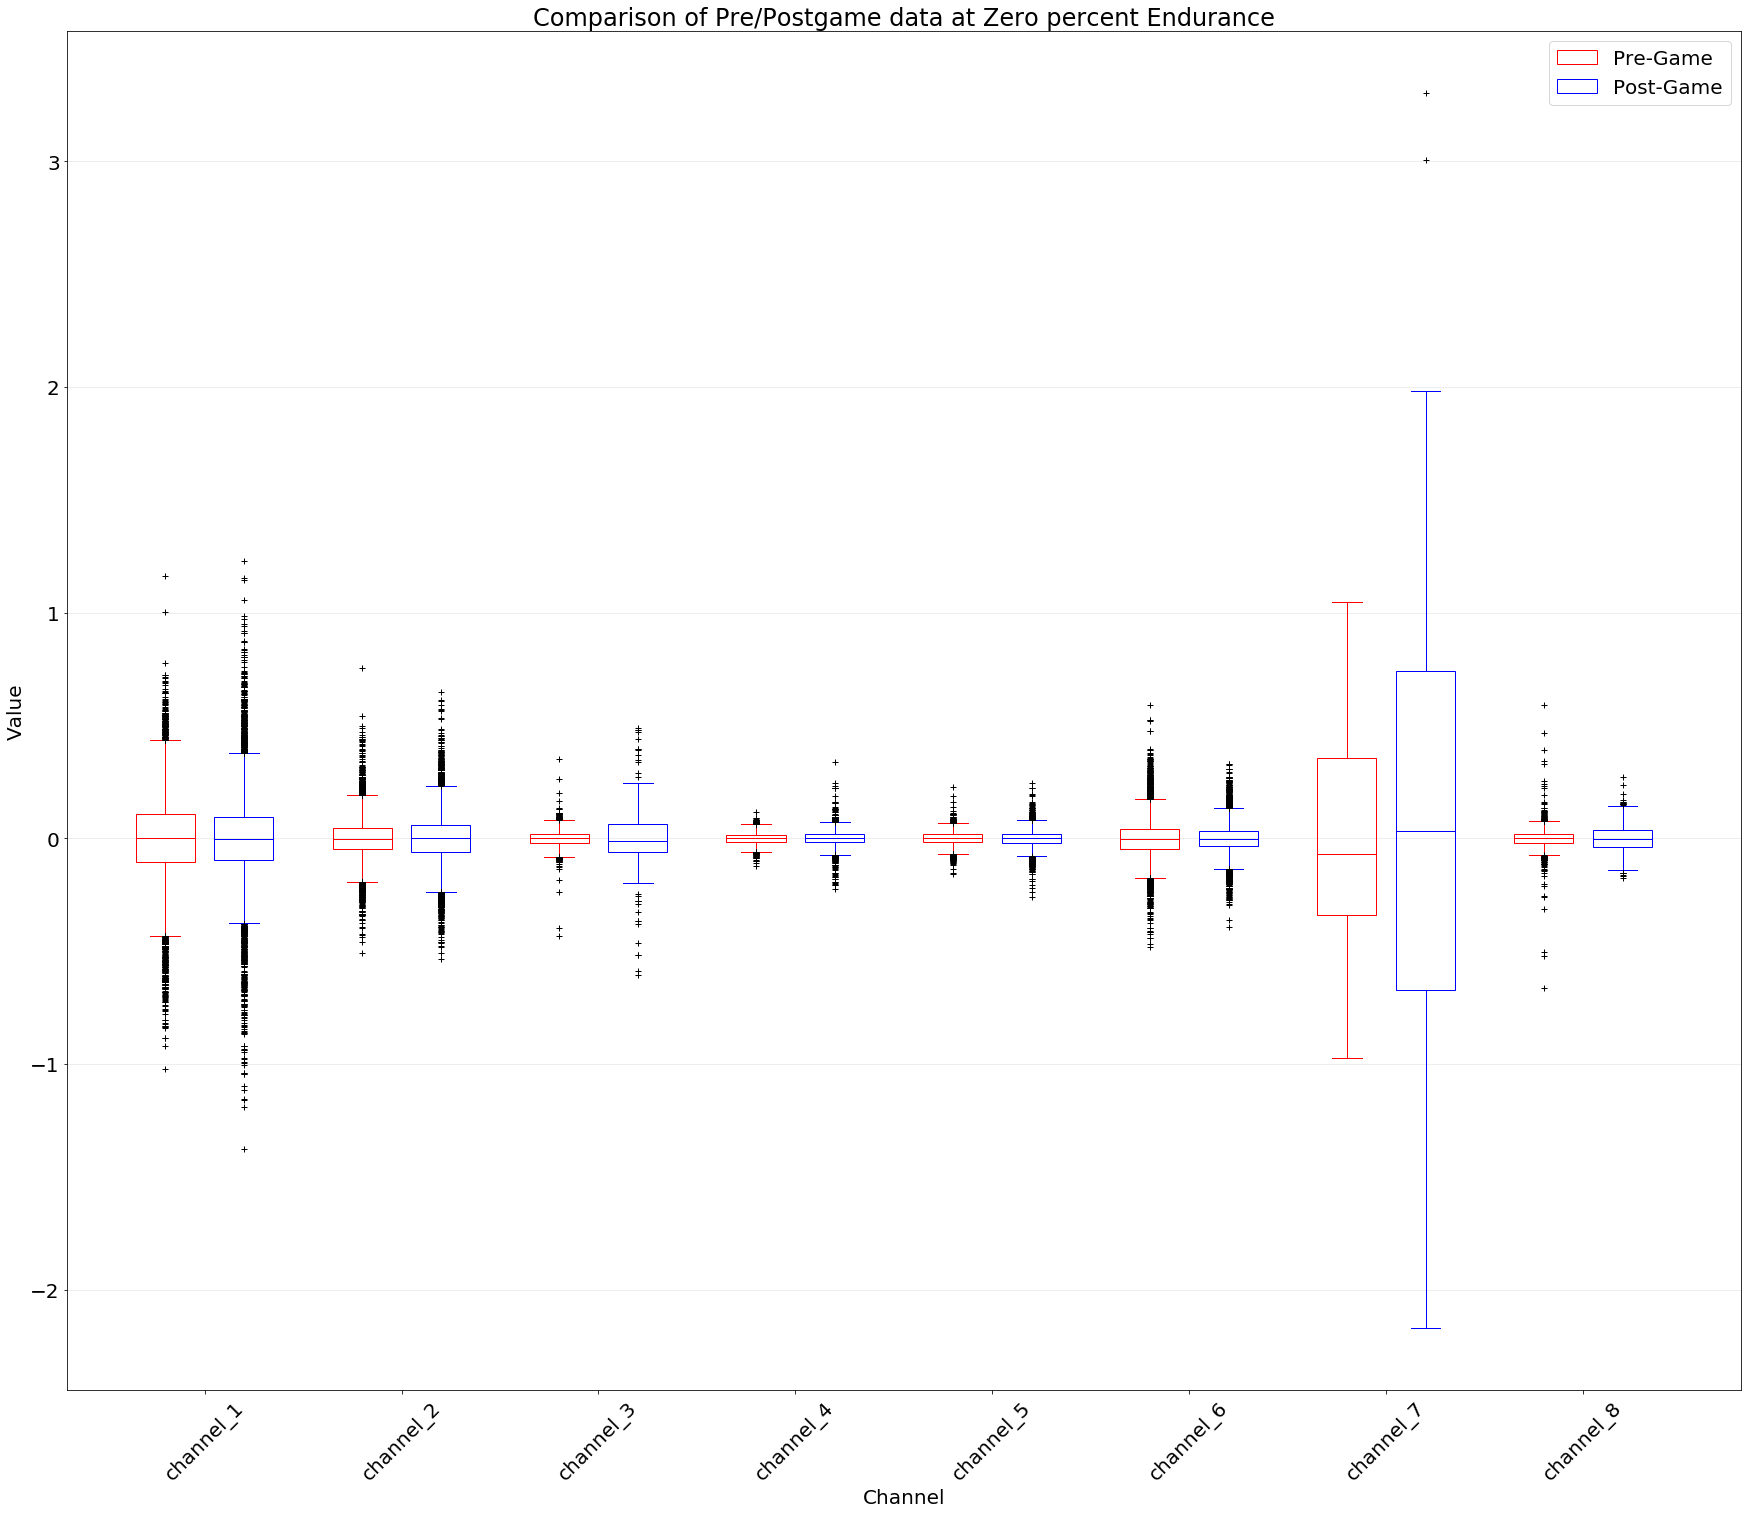

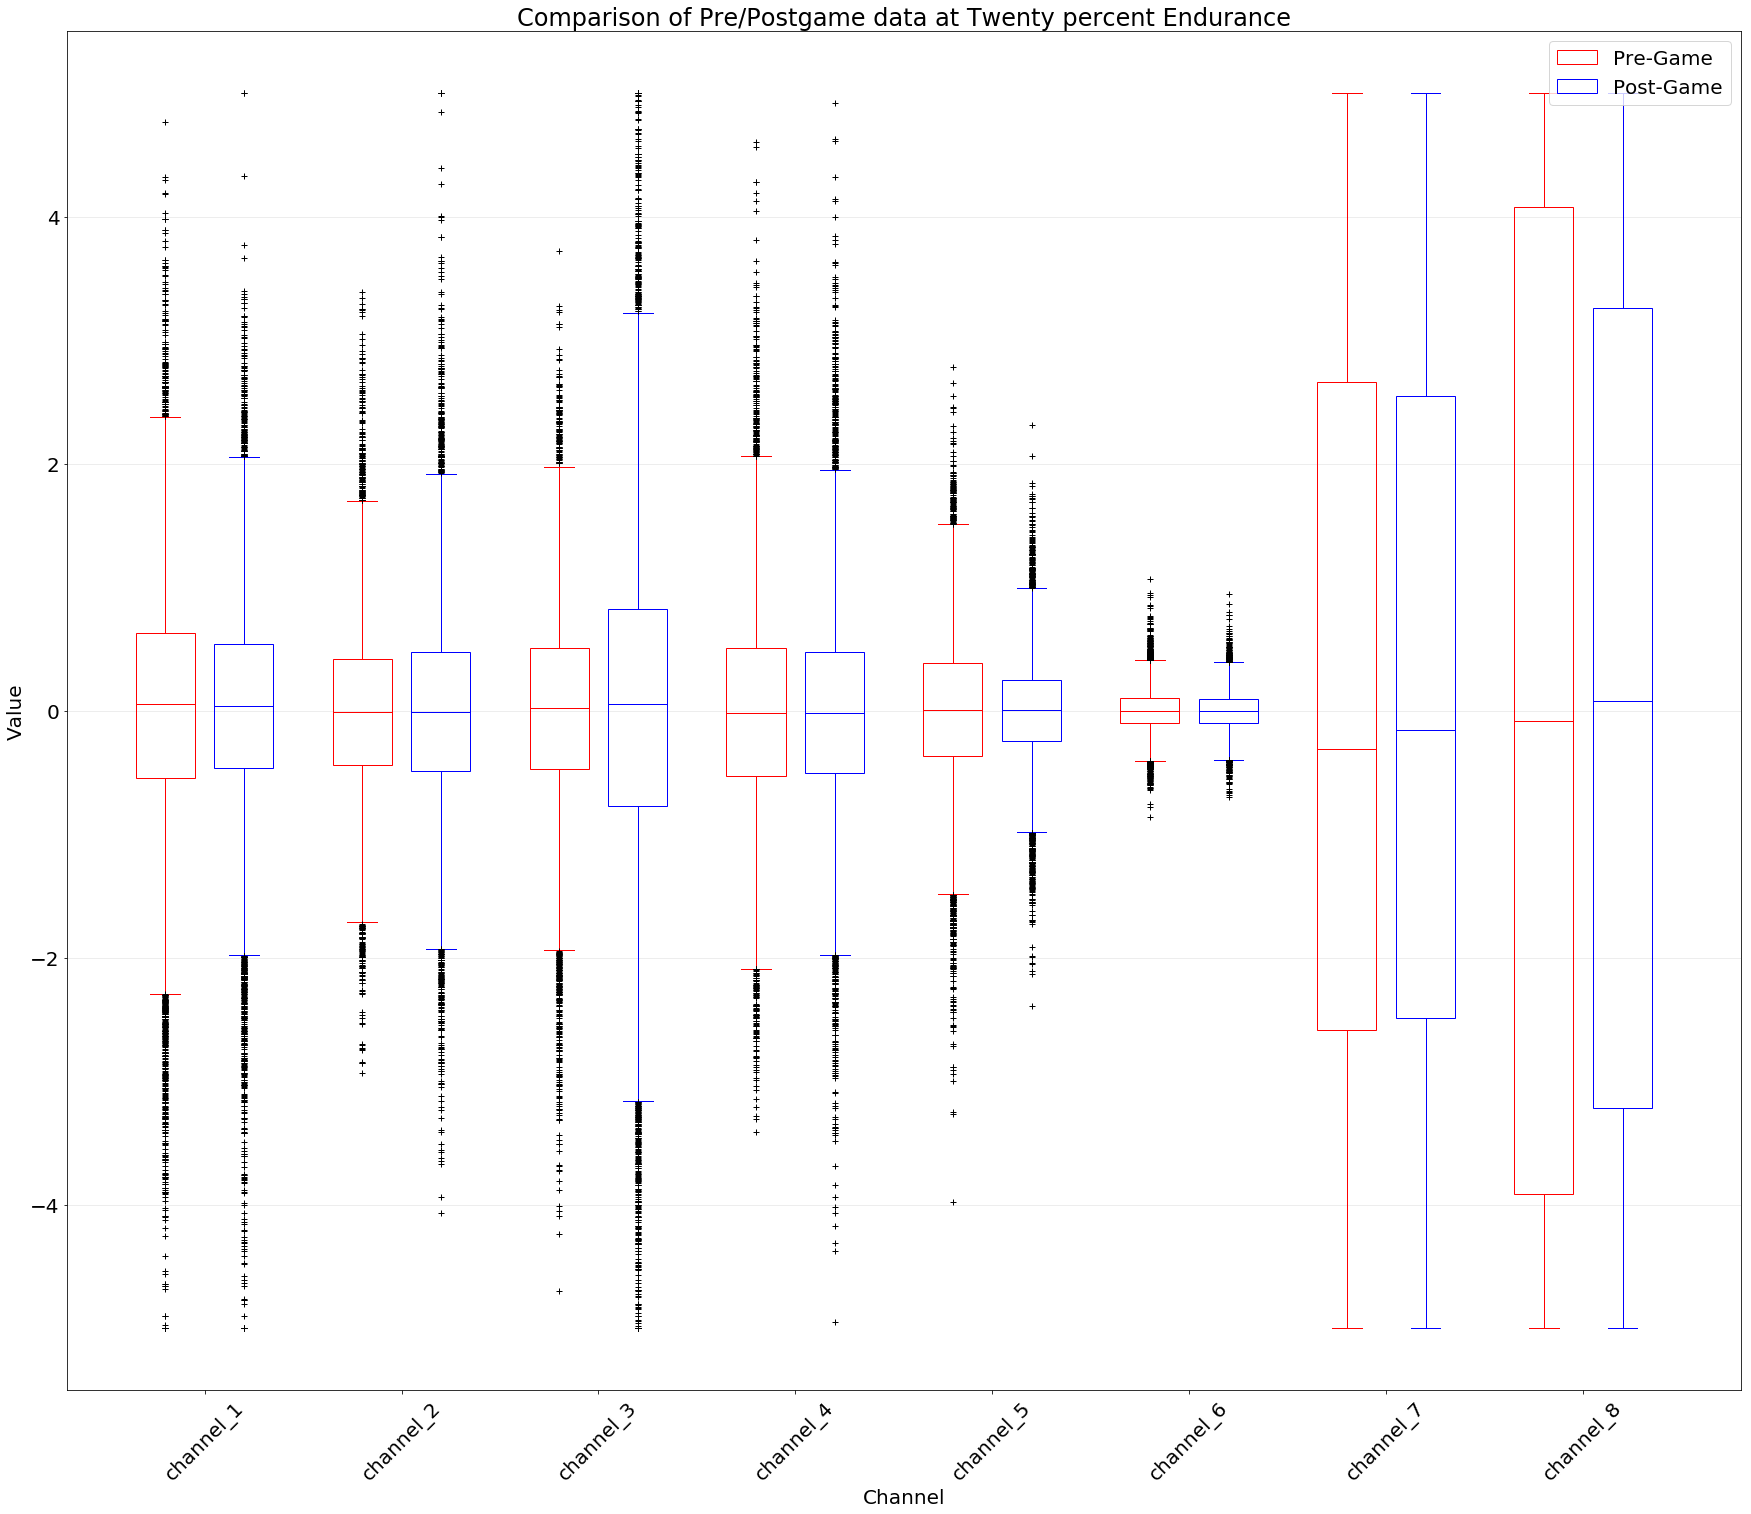

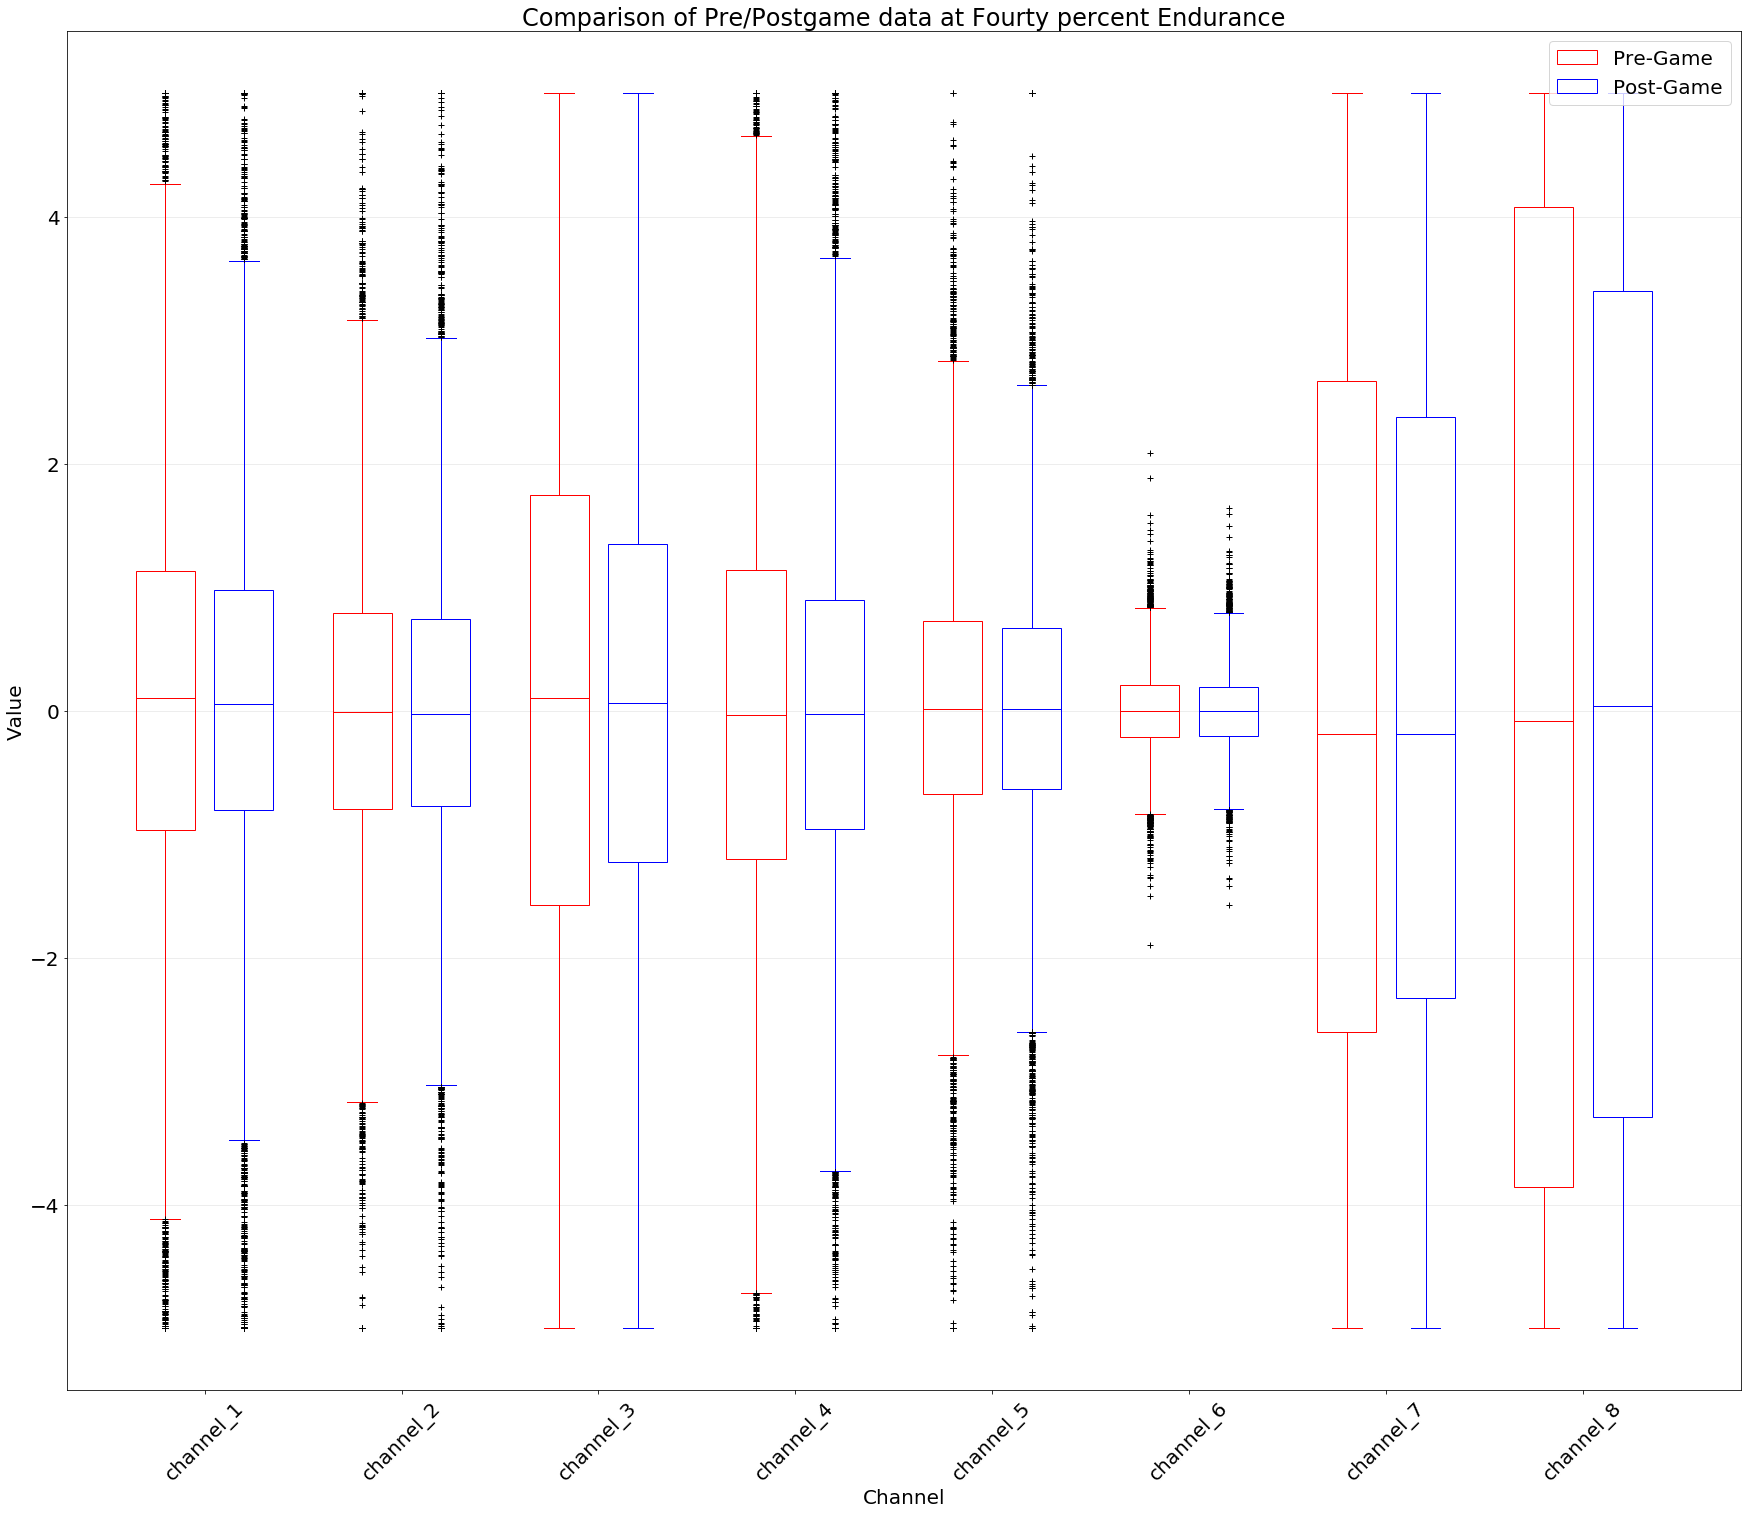

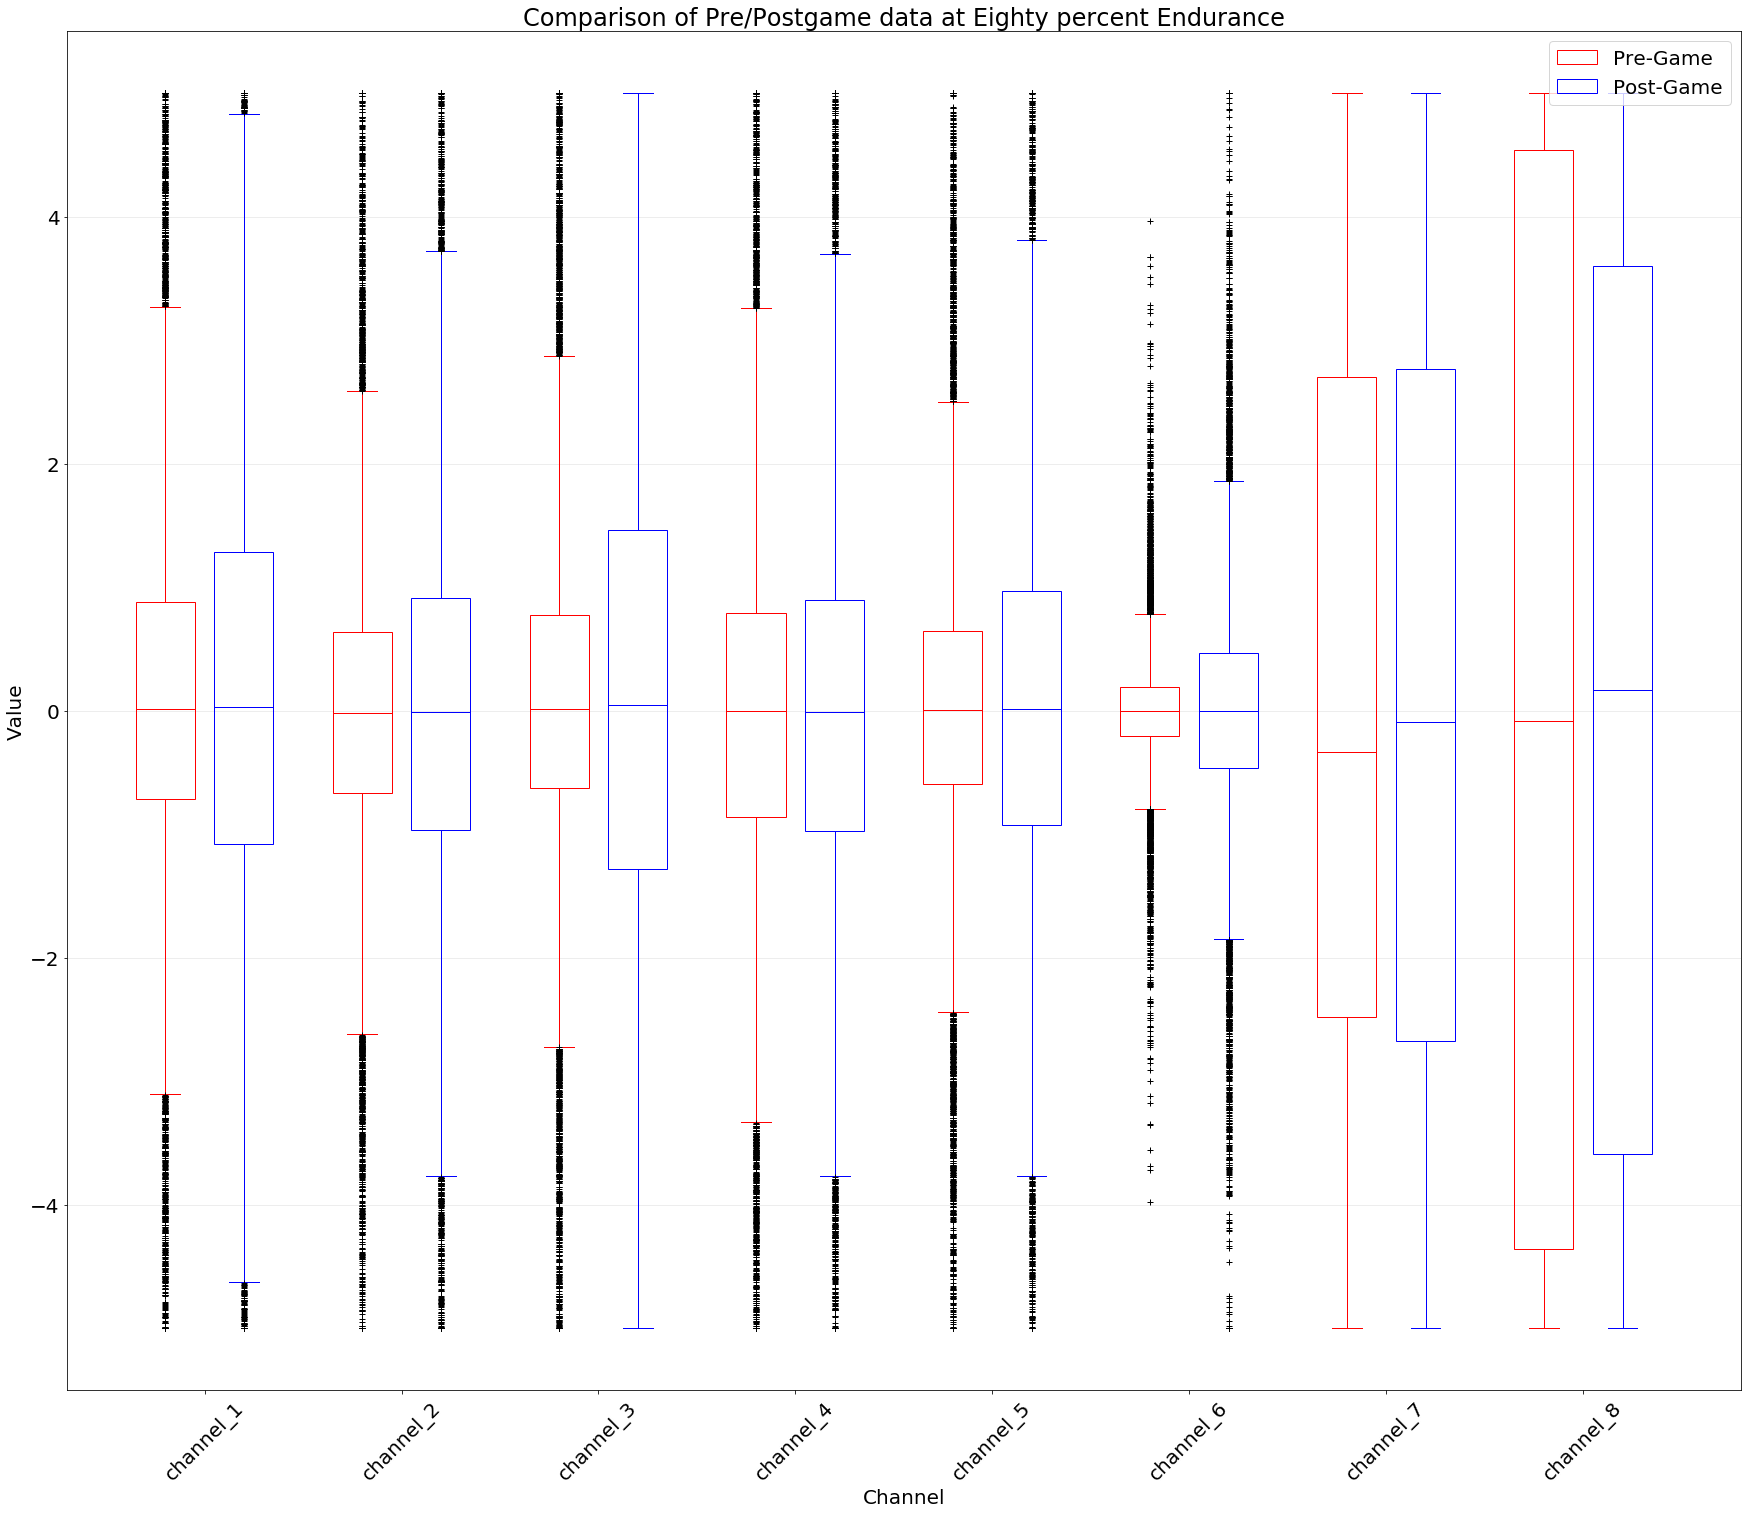

In [13]:
def phase4_plots_to_pdf_all_users():
    user_ids = np.unique(df.userID)
    phase4_movements = ['Zero','Twenty','Fourty','Sixty','Eighty','Hundred']
    for user_id in user_ids:
        pdf = PdfPages("Dataset_plots/Phase4_" + user_id + ".pdf")
        for phase4_movement in phase4_movements:
            fig, ax = plt.subplots(figsize=(30, 25))
            phase4_boxplot_per_user_all_channels(phase4_movement, user_id, ax)
            pdf.savefig(fig)
        pdf.close()

phase4_plots_to_pdf_all_users()